# package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import copy
import sympy
from numpy.linalg import det
import scipy
from numpy.linalg import inv
from tqdm import tqdm
import random
import scipy.stats
%matplotlib inline

# network

In [2]:
network_file_dir = r'../../data/STRINGv11_07.txt'
network_file = open(network_file_dir,mode='rb')
network = nx.read_weighted_edgelist(network_file,create_using=nx.Graph())
print(nx.info(network))
node = network.nodes
print(len(node))

Name: 
Type: Graph
Number of nodes: 15961
Number of edges: 237535
Average degree:  29.7644
15961


# pathway

## KEGG

In [3]:
kegg_dir = '../../data/KEGG_2021_Human.xlsx'
df_kegg = pd.read_excel(kegg_dir,header=None)
df_kegg = df_kegg.fillna(0)
df_kegg_list = df_kegg.values.tolist()
for i in range(len(df_kegg_list)):
    res = []
    for con in df_kegg_list[i] :
        if con == 0:
            continue
        if con not in res:
            res.append(con)
    df_kegg_list[i] = res
    df_kegg_list[i].pop()

In [4]:
df_kegg_list[0][:5]

['ABC transporters', 'ABCA2', 'ABCC4', 'ABCG8', 'ABCC5']

## REACTOME

In [5]:
reactome_dir = 'D://downloads/Reactome.txt'
reactome_set_name=[]
file_1 = open(reactome_dir,'r',encoding='utf-8')
for line in file_1:
    reactome_set_name.append(line.strip())
print(len(reactome_set_name))

1771


In [6]:
file_dir = 'D:/downloads/'
file_name = 'ReactomePathways.xlsx'
file = file_dir+ file_name
reactomedb = pd.read_excel(file,header=None)
reactomedb = reactomedb.fillna(0)
reactome_db = reactomedb.loc[reactomedb[0].isin(reactome_set_name)]
reactome_db
reactome_set_name = []
reactome_name = reactome_db[0].values.tolist()
reactomedb_list = reactome_db.values.tolist()
for i in range(len(reactomedb_list)):
    res = []
    for con in reactomedb_list[i] :
        if con not in res:
            res.append(con)
    reactomedb_list[i] = res
    reactomedb_list[i].pop()
print(len(reactome_db),len(reactomedb_list))

1655 1655


In [7]:
#count = 0
reactome_list_WithoutNodeNotInNetwork = copy.deepcopy(reactomedb_list)
for i in range(0,len(reactomedb_list)):
    for gene in reactomedb_list[i][2:]:
        if gene not in node:
            reactome_list_WithoutNodeNotInNetwork[i].remove(gene)
print(len(reactome_list_WithoutNodeNotInNetwork))

1655


### set2gaussian input

In [8]:
with open('D:/downloads/gene_set_reactome_all.txt','w')as output:
    for pathway in reactome_list_WithoutNodeNotInNetwork:
        for index in range(2,len(pathway)):
            output.write(pathway[0])
            output.write('\t')
            output.write(pathway[index])
            output.write('\n')

# disease

## COVID

In [9]:
COVID_dir = '../../data/COVID-19_Related_Gene_Sets_2021.xlsx'

In [10]:
COVID = pd.read_excel(COVID_dir,header=None)

In [11]:
COVID

0        1           2    \
0    100 gene most correlated to LDLRAD4 based on A...  ARFGEF3     SLC12A6   
1    152 Down Genes from GEN3VA Mouse Lung; Accessi...    MYLIP       RPL22   
2    178 positive hits from CRISPR screen of Heaton...     GAMT      ZNF287   
3    184 proteins up-regualated at 0h in SARS-CoV-2...   MAP3K2    TRAPPC10   
4    192 negative hits from CRISPR screen of Heaton...   FBXW12       GINS4   
..                                                 ...      ...         ...   
473  Top 500 upregulated genes in mouse lung with S...    CDK18        RFX1   
474  Top 500 upregulated genes in mouse spleen with...    SCRIB      TMEM80   
475  Top 772 negative hits from genome-wide CRISPR ...   STARD3  ISY1-RAB43   
476  Top 797 negative hits from genome-wide CRISPR ...   STARD3    LRRC37A3   
477  Up regulated gene from COVID-19 infected bronc...    CADM2       WDPCP   

         3        4         5       6        7         8             9    ...  \
0     IL10RA     RHOH    NFATC2  NFATC1    LNPEP  ARHGAP27        PLXDC2  ...   
1      RPL21     CNBP     RPL23    RPS7      DEK    FBXO16        ATP1B1  ...   
2       SZT2   SCARA3      BRF2   YIPF3    LRRN3    SCARA5       SLC12A2  ...   
3      CPSF3    TJAP1  ARHGAP29   EVA1A   GAPVD1     SRRM1         SYTL4  ...   
4       USP4   CRYBB3    ASRGL1  THEMIS    WDR74   GOLGA8O         HIPK4  ...   
..       ...      ...       ...     ...      ...       ...           ...  ...   
473    SCRIB   GTPBP2      EML3  CAPN15   HNRNPL    HNRNPD         DUS3L  ...   
474   GTPBP2    NISCH    CAPN15    TEP1    ARMC5     DUS3L         CDK16  ...   
475     MECR    LACRT   PRELID1   AP1S1    RPL24     WDR75        GTPBP6  ...   
476  PRELID1   BTBD18     RPL21   RPL23  LRRC37A   ZFYVE26         HSPE1  ...   
477    TEX35  PLEKHA5    SHISA9    AIG1    LPAR6     LACC1  LOC112268387  ...   

      744   745     746    747    748      749   750     751      752     753  
0     NaN   NaN     NaN    NaN    NaN      NaN   NaN     NaN      NaN     NaN  
1     NaN   NaN     NaN    NaN    NaN      NaN   NaN     NaN      NaN     NaN  
2     NaN   NaN     NaN    NaN    NaN      NaN   NaN     NaN      NaN     NaN  
3     NaN   NaN     NaN    NaN    NaN      NaN   NaN     NaN      NaN     NaN  
4     NaN   NaN     NaN    NaN    NaN      NaN   NaN     NaN      NaN     NaN  
..    ...   ...     ...    ...    ...      ...   ...     ...      ...     ...  
473   NaN   NaN     NaN    NaN    NaN      NaN   NaN     NaN      NaN     NaN  
474   NaN   NaN     NaN    NaN    NaN      NaN   NaN     NaN      NaN     NaN  
475   NaN   NaN     NaN    NaN    NaN      NaN   NaN     NaN      NaN     NaN  
476  FLCN  RBM4  RMND5A  POLD1  POLD2  SPATA24  NOS2  CHCHD1  RNF113A  SMNDC1  
477   NaN   NaN     NaN    NaN    NaN      NaN   NaN     NaN      NaN     NaN  

[478 rows x 754 columns]

In [12]:
COVID = COVID.fillna(0)
COVID_list = COVID.values.tolist()
for i in range(len(COVID_list)):
    res = []
    for con in COVID_list[i] :
        if con not in res:
            res.append(con)
    COVID_list[i] = res
    COVID_list[i].pop()
print(len(COVID),len(COVID_list))

478 478


In [13]:
COVID_merge = []
COVID_merge.extend(COVID_list[6])
COVID_merge.extend(COVID_list[9])
COVID_merge.extend(COVID_list[11])
COVID_merge.extend(COVID_list[13])

In [14]:
#print(len(COVID_list[36]))

In [15]:
print(len(COVID_list[290]))
print(len(COVID_list[36]))
print(len(COVID_merge))
ace2 = set(COVID_list[290])
crispr = set(COVID_list[36])
function = set(COVID_merge)
function

28
50
104


{'21 Positive hits from CRISPR screen from Hoffmann et al. (PMID 32935098) in Huh-7.5 cells at 37 deg C',
 '26 Negative hits from CRISPR screen from Hoffmann et al. (PMID 32935098) in Huh-7.5 cells at 33 deg C',
 '27 Positive hits from CRISPR screen from Hoffmann et al. (PMID 32935098) in Huh-7.5 cells at 33 deg C',
 '28 Negative hits from CRISPR screen from Hoffmann et al. (PMID 32935098) in Huh-7.5 cells at 37 deg C',
 'ACAD9',
 'ALG5',
 'ALG8',
 'ANAPC5',
 'AP3B1',
 'BCS1L',
 'BRD2',
 'CHMP2A',
 'COMT',
 'CSDE1',
 'CSNK2B',
 'CUL2',
 'CWC27',
 'DCAF7',
 'DDX10',
 'DNAJC11',
 'DNAJC19',
 'DPH5',
 'ECSIT',
 'EIF4E2',
 'ELOC',
 'EMC1',
 'FAM98A',
 'FBL',
 'GIGYF2',
 'GPAA1',
 'GRPEL1',
 'HECTD1',
 'HS2ST1',
 'INTS4',
 'LARP7',
 'MEPCE',
 'MIB1',
 'MOGS',
 'MRPS2',
 'MRPS25',
 'MRPS27',
 'MRPS5',
 'NARS2',
 'NDUFAF1',
 'NDUFAF2',
 'NDUFB9',
 'NOL10',
 'NPC2',
 'NUTF2',
 'PABPC1',
 'PCF11',
 'PIGO',
 'PITRM1',
 'PLEKHF2',
 'PRIM1',
 'PRIM2',
 'PSMD4',
 'RAB10',
 'RAB14',
 'RAB2A',
 'RAB7

In [16]:
print(ace2 & crispr)

{'ACE2', 'CTSL'}


In [17]:
print(ace2 & function)

{'RAB7A', 'NPC2'}


In [18]:
print(crispr & function)

set()


### Fisher's exact test

In [55]:
set_A_inNetwork_notinSet =0
set_B_inNetwork_notinSet = 0
set_ab = 2
for i in node:
    if i in ace2 and i not in function:
        set_A_inNetwork_notinSet += 1
    if i in function not in ace2:
        set_B_inNetwork_notinSet += 1
    if i not in function and i not in ace2:
        print(i)
#print(set_ab, set_A_inNetwork_notinSet,set_B_inNetwork_notinSet, len(node_11)- (set_ab + set_A_inNetwork_notinSet + set_B_inNetwork_notinSet))

ARF5
ACAP2
RAB1A
COPE
ACAP1
COPZ1
COPZ2
ARFGAP3
ARF1
COPG1
ARFIP1
COPB2
ARCN1
KDELR2
GORAB
COPG2
ARFIP2
USO1
RAB28
RAB1B
ASAP1
ARF3
GBF1
ARFGAP2
RAB11FIP3
SEC22B
ASAP2
ARFGAP1
COPA
ARF4
RAB11FIP4
COPB1
CYTH3
PDE1C
PDE1A
LHX6
CALM2
ADCY10
NCALD
ADCY3
GNB3
ADK
GUCY2C
GUCY1A2
GUCY1B1
ADCY8
GUCY2D
NPR2
GUCY2F
ADCY2
ADCY7
ALDH7A1
ADCY6
DCK
GNG13
ADCY4
PDE1B
GUCY1A1
ADSL
ADCY5
APRT
ADCY1
CALM3
GNAT3
AK3
ADCY9
NPR1
CALM1
PAK2
LAMC2
ARHGEF6
MAPK4
PSMB1
PSMA1
PPP1R12A
MAPK13
PSMC2
PSMD13
NF2
SEM1
PAK1
PSME3
LAMB2
PRKCE
PSMA6
MAP2K1
PSMB3
PAK5
MYH10
ITGA1
SOS2
MYL12A
PAK3
PXN
PSMA4
MYLK
ITGB1
GNB5
F2RL2
CTTN
JUP
MYH9
LAMB1
PSMD1
LCK
AGRN
PSMB8
MAPK12
LAMB3
MAP3K1
PSMB5
ROBO2
SRC
LAMA3
PSMF1
PSMA3
PARD6A
CDH5
LAMC1
PSMD6
CHRNA1
MAP3K4
PSMD12
MUSK
VAV1
LAMA1
UBC
DMD
PSMB10
PSMC3
CASP3
PSMB6
RPS27A
LAMA2
KRAS
MAPK11
GIT2
PSMD2
MYH11
PAK4
PPP1R12B
STAT4
RHOJ
CTNND1
MAP3K2
PSMB4
PSMC6
HRAS
CTNNB1
PSMD10
MYL6
LAMA4
PSMA8
RAF1
CTNNA1
MYL9
GNG12
ACTA1
FLNA
DVL1
LAMA5
RAC3
BRAF
MAP2K4
PTK2
PSMD11
PSMB2
P

RAPGEF2
SGSM2
AP4M1
CADPS
NCS1
GABRA3
RASL10B
RERG
RAB6C
FRK
BNIP2
DENND2D
VPS18
VPS33A
VPS41
DENND2C
PLEKHM2
VPS33B
AGFG1
DENND2A
DENND2B
RABGGTA
GFUS
GMDS
FPGT
CSNK1G2
CSNK1D
WWTR1
SIK1
KIF1C
FOXO1
KSR1
ITGB4
SIK3
BAD
MAP2K2
CASP2
CSNK1G3
TH
FOXO4
SKP1
RGS18
TXNDC9
ITGA6
CRTC2
TFEB
CSNK1E
SPATA18
CSNK1A1
MARK3
MST1
CAMKK2
PIN1
PPP3CC
HDAC5
HSPB6
PPP2R2A
RAN
CSNK1G1
XPO1
CBY1
KPNA1
MST1R
YAP1
MARK2
SNAI1
PPP3R1
DDIT4
PPP2R2B
ARAP2
KDELR1
KDELR3
OSBPL6
PRKG1
NUDT2
PDE6D
GCH1
ITPA
ANKMY2
PRKG2
NOS1
SPR
DHFR
GCHFR
TPH1
MMUT
CBR1
PAH
PCBD1
DHFR2
PTS
QDPR
AKR1C3
MCEE
AGMO
PALS1
PATJ
INSR
PPP2R5E
SOCS1
PPP2R5C
INPP5D
PTPN6
STAT5B
SOCS2
SH2B1
PPP1R3A
PTPN1
EIF4E1B
PPP1CC
PPP2R5D
IRS2
PPP2R5B
DOK1
PTPN2
SGK1
INS-IGF2
SOCS4
IRS4
INSRR
SOCS3
OGT
IGF2
PTPRF
GRB14
GRB10
FGF21
KL
PPP2R5A
ARHGEF17
MCF2
DPYSL3
EFNA2
SDC2
NCF2
CYTH2
PFN2
ARFGEF1
ACE
PLD2
TUBB2B
SMURF1
ERBB3
DCC
ITGB2
MADCAM1
IL2
ARHGAP20
SLIT2
CYTH4
PTP4A3
SMURF2
NTN1
ARHGAP26
DLC1
ARHGAP6
ARHGAP5
ELMO2
ARHGEF25
ABR
ARAP1
EPHA1
DVL2


TBC1D12
LRRTM3
PLEKHS1
AGFG2
EPS15L1
RAB18
CAPZA1
DYNC1LI2
DCTN2
DYNLL1
DYNC1I2
CAPZB
CAPZA3
DCTN4
CAPZA2
DCTN1
DCTN3
DCTN6
DCTN5
ZFYVE1
ACTR10
ACTR1A
ZW10
GALNT2
GALNT1
ATPAF1
ATP23
SLC35F2
PTPMT1
ATPAF2
PABPC3
PAIP2B
TNRC6C
LSM14A
DHX9
PAN3
PABPN1L
YBX1
CSTF3
EIF4G1
PABPN1
EIF4G3
PAIP1
MYO1D
OTUD4
RCC2
KIAA2013
UNC119
INVS
PDXDC1
SLAMF1
BHLHE23
TOR1A
BHLHE22
CTRL
CEP290
IFT80
BBS5
MKKS
OFD1
ARL6
CCDC28B
SSTR3
TTC21B
BBIP1
BBS9
LZTFL1
BBS2
IFT81
BBS12
BBS1
PCM1
BBS7
SF3B2
PDHA2
LDHAL6A
CKMT2
AMBP
ZNF224
TKFC
LDHAL6B
ACO2
MINPP1
ZNF230
S100A12
LDHC
LONRF2
CHST10
ATP6V1C2
ATP6V0D2
ATP6V0A2
FLCN
ATP6AP2
ATP6V1D
MIOS
ATP6V0B
ATP6V1E1
CASTOR1
ATP6V1G2
KCNF1
DEPDC5
TCIRG1
KICS2
SH3BP4
ATP6V1H
ATP6V1B1
ATP6V0E2
CASTOR2
ATP6V0C
NPRL2
BMT2
ATP6V0D1
ATP6V1G3
ATP5MC3
ATP6V1G1
ITFG2
KPTN
FNIP1
ATP6AP1
ATP6V0A1
ATP6V1E2
ATP6V1C1
SLC66A3
ATP6V1B2
ATP6V0A4
ATP6V0E1
WDR59
DMXL1
ATP6V1A
ATP5MC2
WDR24
ATP6V1F
SZT2
TRIM2
PHLPP1
FKBP5
USP1
USP46
CAP2
PDP1
WDR48
USP12
WDR20
CAP1
PHLPP2
SUGT1
MAPRE2
ZNF24


PRCP
DENND10
DNM1L
DENND11
KBTBD2
TMPRSS6
R3HDML
FITM2
BHMT
LOC102724560
NIPSNAP2
SPG21
BHMT2
AHCYL2
SARDH
CBS
MTRR
GNMT
MAT1A
DMGDH
AHCYL1
TAT
ALDH16A1
RHOBTB2
MTSS1
APAF1
FHOD1
WNT5A
PAWR
MDK
NOX1
MCL1
ZFP36L1
SOD3
MSTN
TLR2
CCDC88A
MAPK8IP1
AMOTL1
FBXO32
CYBA
NOXA1
PI3
AKTIP
FOXG1
PDK2
PPL
WDFY2
FSCN1
SWAP70
RBP1
CD81
CARD11
PPM1A
ELAVL4
RIT2
PAXBP1
WDFY4
SPI1
TYROBP
MMADHC
TM9SF4
GPN1
GPN2
GPN3
MED17
PIH1D1
RPAP1
INTS3
RPAP2
POLR2J
POLR2M
RPAP3
LSM4
POLR2G
MBD2
DUSP23
SEC14L5
ALG1
SYNJ2BP
SGK3
C8orf44-SGK3
PCYT1A
WDR53
PHOSPHO1
PCYT1B
ZDHHC19
BDH1
FBXO45
CHKB
RAB40C
RAB40B
OR5D18
THAP1
MPPE1
OR13A1
ANO3
OR1D5
OR6K2
OR51E2
OR8A1
OR13J1
OR4B1
ANXA10
OR9A4
OR11H6
OR1G1
OR6X1
OR10J5
OR4S1
OR2C1
OR2H1
OR2C3
CCDC14
CIZ1
ARMC6
RFX2
CEP164
C2CD3
KIF3C
IQCB1
CC2D2A
NPHP1
NPHP4
RFX1
MKS1
DYNLT2B
SLC6A12
C1S
SLC6A6
NRBP1
ARHGAP23
PPIAL4C
TSC22D1
SLC3A2
PPIAL4E
TECR
KCNJ13
PPIAL4F
PPIAL4G
SLC6A11
DAPK3
UCK1
CAND1
IDH3G
UCK2
ATP1B2
HNRNPUL1
SEMA6A
SFXN1
PPIAL4H
KCNAB3
GID8
DDAH1
SFXN5
SEMA5A
PP

KCNG4
KCNC4
KCNV1
LRGUK
NEU2
COQ9
SVOPL
HLCS
HBB
RNASE1
ADAM32
TMEM114
BFSP1
BFSP2
GJA3
ZFYVE26
CC2D1A
CAPN7
TTC19
LIM2
TRAF3IP3
HOXB7
SWSAP1
POLL
PAXX
RNF144A
ZSWIM7
ETNK2
GOLT1A
ZNF502
PTPRO
KIRREL3
PODXL
KIRREL2
KCNE2
SHLD3
TSSK2
NSMAF
SLC9A6
HDLBP
SELENOP
KCNK1
CCDC121
SLC35G1
KIF27
BIRC6
ARSA
NAIP
OPALIN
TMEM235
ERMN
TMEM70
HTR5A
ACSF3
RIDA
REXO2
RP1
REXO4
PUS7L
TRMT61A
C7orf50
NOM1
GPATCH4
HGH1
URB1
TSSK1B
SMAP2
RAI14
DES
MYBPH
SRL
PDLIM3
TMEM38A
TGIF2-RAB5IF
ARHGAP24
PIGF
PIGS
PGAP2
POTEI
ACOT9
CSF3R
ODR4
CFAP210
ZBTB41
NIBAN1
CPXM1
CARF
GREB1L
WFDC5
WFDC12
ELF5
NKX2-4
NPAS1
HMX3
LDB1
DLX1
PVALB
GSX2
DLX2
SSBP2
HRH4
TIGIT
HCRTR1
KIR3DL1
GPR35
PTAFR
GPR182
DTX2
KIR2DL1
GPR3
SLC9A5
C5AR2
FAN1
POLD3
GEN1
CENPX
SLC25A15
FAAP20
EME1
EME2
POLN
NTHL1
ADAMTSL1
ADAMTS8
ADAMTS1
ADAMTS15
ADAMTSL2
ADAMTS16
ADAMTS20
THSD7A
ADAMTS19
ADAMTS5
ADAMTSL4
ADAMTS10
ADAMTS6
THSD1
SBSPON
ADAMTS2
THBS2
ADAMTS4
ADAMTSL5
ADAMTS3
THSD4
ADAMTS17
ADAMTS18
ADAMTSL3
SPON1
SPON2
B3GLCT
ADAMTS13
ADAMTS7
ADAMTS1

ICAM2
ICAM3
ICAM4
DRG1
STK16
RWDD1
DDX1
PRMT8
APOBEC1
FAM120A
PNRC2
STAU2
RC3H1
PYM1
ZC3H12A
DIDO1
MORC3
SPIN1
ZCWPW2
TRIM66
PYGO1
BCORL1
TRIM67
LCMT2
PPTC7
ZCCHC3
MKRN2
PABPC5
PABPC1L2A
PABPC4L
SPAG17
MRAP2
HIRIP3
SLC22A18
PHLDA2
H1-6
USP17L2
TMEM101
LSM6
LSM5
ZDHHC16
PHF3
POU2F2
CXCL3
NFKBIZ
TLR5
TBX19
CGA
CA1
AIP
HLX
ZFP2
FRMD5
CDH24
GLIS2
CDH26
CDH20
CDH12
CCDC85B
NBPF12
NBPF1
SH3GLB2
SHKBP1
EPHA10
CAPG
RHOBTB1
TACC2
SPAG16
ZNHIT2
KIF19
GLOD4
SLAIN2
TBC1D31
GBP5
DTX3L
SLC25A43
HELQ
MMS22L
FAM98B
H4C7
BRD3
CXCL16
XCL1
GDF5
CCL22
CCL1
CCL16
CCL3L3
PPBP
CXCL6
CCL24
DEFB103B
CCL25
CXCL5
CCL27
CCL17
CCL8
CCL7
CCL15
CCL18
CX3CL1
CCL13
CXCL14
NTN3
FAM107B
ERAP1
NUCB2
WNT7A
FZD10
CDH22
FRZB
WNT16
WNT9B
WNT9A
PORCN
SALL1
SOX3
PTPRU
WNT7B
ACP1
ASCL2
MDFI
CDX1
WNT10B
SOX1
WNT10A
FZD9
GPR37
SLC25A24
PSPC1
ATE1
KIAA1109
MAGEA4
KNCN
MEA1
KLHDC3
DLEU7
FAM83A
FAM83B
DIRAS3
MPHOSPH6
FEM1C
GLMN
GPRASP2
F8A1
F8A3
FICD
HYPK
SLC25A12
MFGE8
CYB5RL
CYP4F12
CYTL1
CYP3A7-CYP3A51P
CYP4X1
SULT1A2
FDX1
CYP2R1

GXYLT2
JPH4
ANKRD34B
NAT9
HSD17B13
VSTM4
TMEM170B
ABHD3
ZP2
RHBDD2
SERPINB9
CARD18
CABS1
SPINK14
KLHL36
ZSWIM6
HECW2
ZNF782
VRTN
PSG3
MEGF6
STAB2
ZBTB2
SDCBP2
LRCOL1
NMU
NMS
ATP11B
ATP11A
TXNDC12
PKIG
CKLF
LRRC25
MEDAG
ATP13A3
SMCP
ABITRAM
PRR19
LCE2B
LCE5A
SPRR2D
SPRR2E
LCE6A
SPRR2F
LCE3D
LCE3A
LCE1E
LCE1C
SPRR2B
LCE3E
LCE1B
LCE2C
LCE4A
LCE1A
LCE2D
SPRR2A
LCE3B
SPRR2G
LCE1D
LCE2A
LCE1F
IRX2
IRX3
IRX4
MAN2B1
MAN2B2
C17orf75
SUGCT
SP140
DCLK1
REEP3
YAE1
LTO1
RHBDL1
ZNF524
TMCO2
EMC8
ACSM4
ZKSCAN1
SLC19A2
SLC19A3
TMEM168
NMRAL1
ATP2C1
ABCB10
ACBD7
NEU4
ITLN2
FOXF1
FOXL1
CYLC1
CLCN4
PARP11
STAC
VCX3B
VCX
VCX2
CXorf58
SLC25A46
TCHHL1
TRIM46
SCAMP3
RSPH10B
ZNF740
PIGZ
CNTN5
FBRSL1
MIPOL1
BMP3
COL15A1
COLGALT1
VMA21
OCSTAMP
SLC9B2
LRRC2
TSPYL1
CFAP74
HMCN2
SNN
RTP3
ZNF33A
ZNF567
CRACDL
TRDMT1
BEND6
MSS51
GPBP1L1
NGRN
ZC2HC1A
INA
SLC4A10
SLC9A7
KRBOX4
ETNPPL
PCYT2
NPY2R
CALHM1
TMEM185B
FAM171B
CALHM6
PRRT3
GPM6B
CLVS1
NFE2L3
SOX5
BACH2
TRNT1
POU4F2
METAP1D
BMP8A
INHBC
DAND5
CER1
GDF6
BMP8B
GD

LYPD5
CLEC12B
SPATA3
CBWD6
TMEM125
SP5
OR6C65
ZNF780B
RBM48
FAHD2B
PON3
SLC10A6
SLC10A5
MS4A15
OR1L4
C8orf74
C1orf141
PRB2
SPATA46
NHLRC3
NKAPL
LECT2
MMP26
GLYAT
CFAP119
LYPD4
GJD4
KRTDAP
GOLGA6L10
XKR3
LYSMD1
CCDC17
MTRNR2L11
KRTAP26-1
KRTAP1-1
KRTAP6-2
GLOD5
CFAP141
TEX33
XKRX
LKAAEAR1
BIVM
PHF24
OOSP2
BOD1L2
SPANXN4
TASL
SPATA19
GARIN1B
TMEM270
CTAGE1
GJB7
DEFB104B
DEFB104A
PGLYRP4
PGLYRP3
C8orf34
ZNF771
OR4F29
XAGE1A
XAGE2
XAGE1B
SMR3A
OR4D10
PPP1R32
KRTAP3-1
KRTAP22-1
KRTAP6-3
SPINDOC
TEX36
SLFNL1
NPIPB9
PRR23A
PSG4
ERICH2
C7orf31
RNASE12
HHLA2
MS4A5
SPATA9
ETV3L
GTSF1L
PRR22
MS4A10
C12orf40
TMEM213
C9orf43
DEFB130A
CFAP77
PRR23C
IQCF6
S100A7L2
MTRNR2L3


In [56]:
for i in ace2:
    if i not in node:
        print(i)

Top 32 genes involved in SARS-CoV-2 infection from genome-wide CRISPR screen of Zhu et al.


In [57]:
from scipy.stats import fisher_exact
oddsr, p = fisher_exact([[2,25],[83,18309]], alternative='two-sided')
print(p,oddsr)

0.006854249456857065 17.64722891566265


In [58]:
set_A_inNetwork_notinSet =0
set_B_inNetwork_notinSet = 0
set_ab = 2
for i in node:
    if i in ace2 and i not in crispr:
        set_A_inNetwork_notinSet += 1
    if i in crispr not in ace2:
        set_B_inNetwork_notinSet += 1
    
print(set_ab, set_A_inNetwork_notinSet,set_B_inNetwork_notinSet, len(node)- (set_ab + set_A_inNetwork_notinSet + set_B_inNetwork_notinSet))

2 25 45 15889


In [59]:
from scipy.stats import fisher_exact
oddsr, p = fisher_exact([[2,25],[47,18345]], alternative='two-sided')
print(p,oddsr)

0.002332312395297329 31.22553191489362


# drug database

## CCLE

In [58]:
CCLE_dir = "D:/downloads/CCLE_Proteomics_2020.xlsx"
CCLE = pd.read_excel(CCLE_dir,header=None)

In [211]:
CCLE = CCLE.fillna(0)
CCLE_list = CCLE.values.tolist()
for i in range(len(CCLE_list)):
    res = []
    for con in CCLE_list[i] :
        if con not in res:
            res.append(con)
    CCLE_list[i] = res
    CCLE_list[i].pop()
print(len(CCLE),len(CCLE_list))

378 378


In [214]:
CCLE_list[0]

['22RV1 PROSTATE TenPx24',
 'NIPSNAP3A',
 'NIPSNAP3B',
 'CADM2',
 'CACNA2D1',
 'CKMT1A',
 'C12ORF73',
 'COMTD1',
 'LARP7',
 'EML6',
 'SCO2',
 'ZC3H11A',
 'UQCRC2',
 'UQCRC1',
 'DCHS2',
 'RABL3',
 'FSIP2',
 'ATF3',
 'ZNF276',
 'PON1',
 'HPGD',
 'ATP5A1',
 'EWSR1',
 'LSM10',
 'NXF2',
 'KIAA1324',
 'BBX',
 'SAMD1',
 'HES1',
 'TEX15',
 'CCSAP',
 'AR',
 'MRPL10',
 'FAM111B',
 'CTAGE1',
 'CTAGE5',
 'JTB',
 'HYOU1',
 'ATF4',
 'UNC119B',
 'MDC1',
 'C5ORF24',
 'HPN',
 'OSGEPL1',
 'MEAF6',
 'MRPL19',
 'MRPL17',
 'SDR39U1',
 'MRPL18',
 'MRPL15',
 'MRPL16',
 'ZNF24',
 'GATA3',
 'MRPL13',
 'PLA2G7',
 'MRPL14',
 'MRPL11',
 'TSKU',
 'EDRF1',
 'GRPEL2',
 'SCP2',
 'LOH12CR1',
 'NKX3-1',
 'SUPT20H',
 'ZBTB7B',
 'TPSAB1',
 'SDF2L1',
 'CENPU',
 'PNPT1',
 'RING1',
 'MRPL28',
 'SIRT6',
 'NSUN7',
 'MRPL27',
 'MRPL24',
 'MRPL23',
 'SUMF2',
 'CS',
 'MRPL32',
 'MBLAC2',
 'MRPL30',
 'ECSIT',
 'PXMP2',
 'LYRM7',
 'CENPN',
 'TMEM106C',
 'CENPQ',
 'CENPT',
 'ERGIC1',
 'RBMY1B',
 'PET117',
 'MRPL39',
 'MRPL37',
 'MR

## DrugMatrix

In [19]:
DrugMatrix_dir = 'D:/downloads/DrugMatrix.xlsx'

In [20]:
DrugMatrix = pd.read_excel(DrugMatrix_dir,header=None)

In [21]:
DrugMatrix

0          1          2    \
0     (+)-Pulegone-200 mg/kg in CMC-Rat-Kidney-1d-dn        EGF     ADHFE1   
1     (+)-Pulegone-200 mg/kg in CMC-Rat-Kidney-1d-up  MGC105753       WSB2   
2     (+)-Pulegone-200 mg/kg in CMC-Rat-Kidney-3d-dn        EGF      IFRD1   
3     (+)-Pulegone-200 mg/kg in CMC-Rat-Kidney-3d-up  MGC105753     STARD7   
4     (+)-Pulegone-200 mg/kg in CMC-Rat-Kidney-5d-dn       GAMT       WSB2   
...                                              ...        ...        ...   
7871    Zopiclone-414 mg/kg in Water-Rat-Liver-1d-up       WSB2     STARD7   
7872    Zopiclone-414 mg/kg in Water-Rat-Liver-3d-dn       GAMT      ACSL1   
7873    Zopiclone-414 mg/kg in Water-Rat-Liver-3d-up  NIPSNAP3A       WSB2   
7874    Zopiclone-414 mg/kg in Water-Rat-Liver-5d-dn       GAMT  MGC105753   
7875    Zopiclone-414 mg/kg in Water-Rat-Liver-5d-up      IFRD1  LOC302085   

           3          4      5           6           7           8    \
0        RPL23      ACSL4  HSPE1  RGD1359339       SRRM2  RGD1305283   
1        ACSL3      IFRD1  RPL21       CIDEB       OKL38       SEPP1   
2       ENTPD4  LOC302085  RPL23      HPCAL1       HSPE1   LOC500590   
3        OKL38    MRPS18B  SEPP1       LARP5        UPB1  RGD1561319   
4        RPL21  LOC302085    DEK       CIDEA       SEPP1        UPB1   
...        ...        ...    ...         ...         ...         ...   
7871     IFRD1     ADHFE1  RPL23      TM4SF4  RGD1311161        AMFR   
7872  SERPIND1      SEPP1  SERT1          PC       AZGP1     PPP1R3C   
7873    STARD7      IFRD1  RPL23        AMFR       ACSL4       CIDEA   
7874     ACSL1   SERPIND1  CIDEB       OKL38      MSL2L1       SEPP1   
7875     TRAP1      ACSL4  CIDEA       HSPE1  RGD1561319       AZGP1   

           9    ...  542  543  544  545  546  547  548  549  550  551  
0       TMEM77  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1         UPB1  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2     HIST1H4B  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3           PC  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4        RRAGA  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
7871     ACSL4  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7872      RBP1  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7873     HSPE1  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7874     SERT1  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7875       CCS  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[7876 rows x 552 columns]

In [22]:
DrugMatrix = DrugMatrix.fillna(0)
DrugMatrix_list = DrugMatrix.values.tolist()
for i in range(len(DrugMatrix_list)):
    res = []
    for con in DrugMatrix_list[i] :
        if con not in res:
            res.append(con)
    DrugMatrix_list[i] = res
    DrugMatrix_list[i].pop()
print(len(DrugMatrix),len(DrugMatrix_list))

7876 7876


In [95]:
drug_dict = {}
for i in range(len(DrugMatrix_list)):
    drug_dict[DrugMatrix_list[i][0]] = DrugMatrix_list[i][1:]

In [96]:
drug_dict

{'(+)-Pulegone-200 mg/kg in CMC-Rat-Kidney-1d-dn': ['EGF',
  'ADHFE1',
  'RPL23',
  'ACSL4',
  'HSPE1',
  'RGD1359339',
  'SRRM2',
  'RGD1305283',
  'TMEM77',
  'NINJ1',
  'BRE',
  'LACTB2',
  'RBP1',
  'CTH',
  'ETHE1',
  'SUB1',
  'HARPB64',
  'CALM3',
  'RAN',
  'RGD1306495',
  'CGGBP1',
  'LOC690109',
  'RAMP4',
  'CCNI',
  'TAGLN',
  'RPL10',
  'AQP7',
  'ATP5A1',
  'KRT2-7',
  'ARNTL',
  'MCART2',
  'SEPHS1',
  'TGOLN2',
  'AKT1',
  'ST3GAL5',
  'ST3GAL6',
  'MAL2',
  'SEPHS2',
  'RALY',
  'RGD1562501',
  'ACTL6A',
  'RAB3IP',
  'RGD1305975',
  'RGD1562987',
  'PARP16',
  'EHD1',
  'SULT1C2A',
  'RGD1309543',
  'SLC6A8',
  'RGD1307481',
  'UCK1',
  'NET1',
  'HBP1',
  'PSME1',
  'CRYAB',
  'PKIG',
  'PRKCN',
  'RGD1308210',
  'LOC361985',
  'SPARC',
  'RGD1561880',
  'RGD1564596',
  'RPL32',
  'SCOC',
  'POP5',
  'WFDC2',
  'PTTG1IP',
  'ATP5C1',
  'MGST1',
  'SUV420H2',
  'GSPT1',
  'RGD1309410',
  'RGD1309534',
  'GRPEL1',
  'RPS19',
  'STMN1',
  'PRDX2',
  'TSPAN8',
  'TNFSF12

# set2gaussian output

In [23]:
kegg_gene_set_name = pd.read_table('D:/downloads/HighConfidence_kegg/kegg_300/gene_set_name_kegg.txt',header=None)
kegg_gene_set_name = kegg_gene_set_name[0]
kegg_gene_set_name
#reactome_gene_set_name['name'] = reactome_gene_set_name[0]
#del reactome_gene_set_name[0]
#reactome_gene_set_name

0                           Ras signaling pathway
1      Synthesis and degradation of ketone bodies
2                           Tryptophan metabolism
3                             Cellular senescence
4                                        Melanoma
                          ...                    
315                         Fatty acid elongation
316                            Mineral absorption
317                                 Legionellosis
318            Vascular smooth muscle contraction
319                            Nicotine addiction
Name: 0, Length: 320, dtype: object

In [24]:
mu = np.load('D:/downloads/HighConfidence_kegg/kegg_300/output_embed__pathway_path_mu.out.npy')
#cov = np.load('D:/downloads/HighConfidence_kegg/kegg_300/output_embed__pathway_path_cov.out.npy')
g2g = np.load('D:/downloads/HighConfidence_kegg/kegg_300/output_embed__pathway_g2g_node_emb.out.npy')
p2g = np.load("D:/downloads/HighConfidence_kegg/kegg_300/output_embed__pathway_p2g.out.npy")
len(p2g)

320

In [25]:
#print(len(mu))
#print(len(mu[0]))
#mu

In [26]:
#print(len(cov))
#print(len(cov[0]))
#print(len(cov[0][0]))
#cov

In [27]:
print(len(g2g))
print(len(g2g[0]))
g2g

15961
300


array([[ 0.14997455,  0.03728954, -0.16986829, ..., -0.721358  ,
         0.61343336,  1.6425161 ],
       [-0.07542448,  0.14683704, -0.3118971 , ..., -0.17488435,
         0.9761588 ,  1.3978577 ],
       [-0.16300417, -0.02401887, -0.38765138, ..., -0.4417364 ,
         0.21016009,  1.8259343 ],
       ...,
       [ 0.13495177, -0.1015507 , -0.30962887, ..., -0.00964957,
        -0.07726423, -0.07330634],
       [ 0.14598647, -0.09112392,  0.08978819, ...,  0.29352707,
        -0.11388043,  0.39336783],
       [ 0.17215613, -0.00992213, -0.16974814, ...,  0.00513786,
        -0.07396954, -0.08642484]], dtype=float32)

In [28]:
print(len(p2g))
print(len(p2g[0]))
p2g

320
15961


array([[13.0048914 , 18.60439682, 10.77054501, ..., 18.91812515,
        15.75361538, 18.73526573],
       [10.54925823, 11.03357506,  9.80605125, ..., 19.50169754,
        13.78735733, 19.94822311],
       [ 8.51194   , 10.52040005,  8.52526951, ..., 18.76291275,
        17.57646561, 18.84948921],
       ...,
       [11.01446342, 11.87791634, 10.34681511, ..., 18.742239  ,
        17.37133026, 18.41414642],
       [ 7.945333  ,  8.79445934,  8.04493618, ..., 19.30413628,
        16.78544998, 18.40201569],
       [ 7.69208431, 10.33734703,  5.26964617, ..., 18.94577599,
        15.73103523, 19.77088165]])

## g2g preprocess

In [29]:
g2g_dataframe = pd.DataFrame(g2g)
g2g_dataframe['gene']=node
g2g_dataframe = g2g_dataframe.set_index('gene')
g2g_dataframe

0         1         2         3         4         5    \
gene                                                                   
ARF5      0.149975  0.037290 -0.169868 -0.157117 -0.114900 -0.002312   
ACAP2    -0.075424  0.146837 -0.311897  0.038846  0.052047  0.086256   
RAB1A    -0.163004 -0.024019 -0.387651 -0.134949 -0.058999 -0.077723   
COPE      0.036254  0.097664 -0.322370 -0.105176  0.058348  0.122609   
ACAP1     0.088679  0.013420 -0.036734 -0.023136 -0.290483 -0.032173   
...            ...       ...       ...       ...       ...       ...   
CFAP77    0.065508  0.194203 -0.143959 -0.112470 -0.156552 -0.376265   
PRR23C    0.164783 -0.031773 -0.071346  0.015850  0.290223  0.036937   
IQCF6     0.134952 -0.101551 -0.309629 -0.134761  0.105318  0.002783   
S100A7L2  0.145986 -0.091124  0.089788 -0.156575  0.279600 -0.065983   
MTRNR2L3  0.172156 -0.009922 -0.169748 -0.097112  0.090393  0.022789   

               6         7         8         9    ...       290       291  \
gene                                              ...                       
ARF5     -0.230968  0.104046  0.174171 -0.049781  ... -0.089971 -0.254667   
ACAP2    -0.088711  0.118783  0.201157 -0.010640  ... -0.160904 -0.095572   
RAB1A     0.170445  0.146167 -0.020136 -0.122569  ... -0.384214 -0.463176   
COPE     -0.175409 -0.009325 -0.023817  0.050343  ...  0.340274 -0.407290   
ACAP1     0.000306  0.020311  0.146374 -0.126240  ... -0.122595 -0.262638   
...            ...       ...       ...       ...  ...       ...       ...   
CFAP77    0.115548  0.175934  0.032740  0.133873  ... -0.156691 -0.258620   
PRR23C    0.018359  0.064349 -0.212511  0.095208  ... -0.354655  0.037937   
IQCF6    -0.087199  0.111974 -0.238812  0.015629  ... -0.026417 -0.120801   
S100A7L2 -0.377315 -0.124785  0.022467  0.075294  ... -0.092097 -0.112428   
MTRNR2L3 -0.022820  0.143637 -0.169133  0.058359  ... -0.011298 -0.115990   

               292       293       294       295       296       297  \
gene                                                                   
ARF5     -0.280530 -0.800504 -0.506039  0.435302 -1.244120 -0.721358   
ACAP2    -0.097176 -0.553882 -0.411733  0.354265 -1.288214 -0.174884   
RAB1A    -0.177493 -1.457114 -0.952020  0.987618 -1.650460 -0.441736   
COPE     -0.574239 -0.937956 -0.926029  0.167821 -1.245971 -1.114583   
ACAP1     0.067512 -0.523326 -0.354528  0.043972 -0.650846 -0.366393   
...            ...       ...       ...       ...       ...       ...   
CFAP77    0.017624 -0.253683 -0.211852  0.312278  0.059296 -0.472935   
PRR23C    0.037358 -0.078771 -0.155729 -0.284284  0.165660  0.180138   
IQCF6     0.092237 -0.131247 -0.031017 -0.017382 -0.115295 -0.009650   
S100A7L2  0.240911 -0.247859 -0.166712 -0.137839 -0.055621  0.293527   
MTRNR2L3  0.097138 -0.093478 -0.030675 -0.060987 -0.088703  0.005138   

               298       299  
gene                          
ARF5      0.613433  1.642516  
ACAP2     0.976159  1.397858  
RAB1A     0.210160  1.825934  
COPE     -0.066414  1.702096  
ACAP1     1.010563  1.843736  
...            ...       ...  
CFAP77   -0.142774  0.186995  
PRR23C    0.054500  0.116083  
IQCF6    -0.077264 -0.073306  
S100A7L2 -0.113880  0.393368  
MTRNR2L3 -0.073970 -0.086425  

[15961 rows x 300 columns]

### extract genes' vector

In [25]:
g2g_dataframe_disease_pathway = g2g_dataframe[g2g_dataframe.index.isin(ace2)]
g2g_dataframe_disease_pathway

0         1         2         3         4         5    \
gene                                                                      
RAB7A        0.022178 -0.055640 -0.201210 -0.015118 -0.188326 -0.015908   
VPS29        0.041450  0.001487  0.025648 -0.266313 -0.085632 -0.186372   
VPS35        0.260943 -0.174859 -0.053767 -0.032490 -0.048345 -0.227013   
ACTR2        0.142029 -0.316022  0.119639  0.133224 -0.062078 -0.437041   
ARPC3        0.022142 -0.175853 -0.022178  0.178342 -0.009038 -0.292300   
ARPC4        0.054760 -0.131207 -0.019061  0.171200 -0.037743 -0.248629   
ACTR3        0.113556 -0.141153 -0.084623  0.060836 -0.155838 -0.389953   
COMMD3-BMI1  0.189190 -0.007340 -0.028933 -0.066898  0.009092  0.004494   
NPC1         0.102417 -0.139809 -0.173949 -0.056705 -0.178511  0.160102   
CCZ1        -0.019629 -0.079048 -0.056893 -0.048743 -0.181949  0.089275   
ACE2         0.048304 -0.015851  0.017926  0.035441  0.113974  0.062308   
CCDC22      -0.269121  0.008326 -0.211533  0.395432  0.020307 -0.205873   
ASCC3       -0.042735  0.129697 -0.223488 -0.288109  0.186163  0.176843   
TFE3        -0.092435 -0.143547 -0.166067 -0.198689 -0.060836 -0.045929   
CCZ1B       -0.000380 -0.004028 -0.144361 -0.041813 -0.202777  0.048421   
CTSL        -0.027649  0.015938 -0.009115 -0.058273  0.046818 -0.085605   
COMMD7      -0.107583 -0.106210 -0.289197  0.227233 -0.015866 -0.124352   
COMMD5      -0.096358  0.115530 -0.375032  0.290929 -0.138387 -0.110437   
COMMD8      -0.048052  0.054634 -0.441736  0.540206  0.141549  0.056022   
COMMD4      -0.148474  0.034495 -0.352822  0.254184 -0.020089 -0.085133   
COMMD2      -0.057729 -0.005890 -0.253959  0.259676  0.003867 -0.058998   
COMMD10     -0.151051 -0.001515 -0.342552  0.247020 -0.059794 -0.082011   
COMMD3      -0.198036 -0.064801 -0.287452  0.397981 -0.009842 -0.031833   
CCDC93      -0.237307 -0.102877 -0.212194  0.110540  0.070669 -0.079632   
WDR91        0.471125 -0.069831 -0.063228 -0.071699 -0.005076 -0.174133   
WDR81        0.576736 -0.177549  0.021852 -0.017107  0.009778 -0.135101   
NPC2         0.237416 -0.113744 -0.126035 -0.165505 -0.063524  0.386771   

                  6         7         8         9    ...       290       291  \
gene                                                 ...                       
RAB7A       -0.000558  0.033286 -0.110532  0.184640  ... -0.467682 -0.182319   
VPS29        0.006970  0.165371  0.009342  0.028353  ... -0.570832 -0.261074   
VPS35        0.329565  0.217826 -0.310671 -0.015732  ... -0.299005  0.092172   
ACTR2       -0.070897  0.060448  0.196248  0.139881  ...  0.345415  0.614687   
ARPC3       -0.087999 -0.034262  0.009168  0.027508  ...  0.223051  0.659796   
ARPC4       -0.111539 -0.085790  0.087632  0.115538  ...  0.194346  0.756982   
ACTR3       -0.145922 -0.090755  0.507156  0.273185  ...  0.170366  0.685921   
COMMD3-BMI1  0.121493 -0.119051 -0.045198 -0.120440  ... -0.027518 -0.415906   
NPC1        -0.216418  0.018329  0.034599  0.410413  ... -0.069120  0.006082   
CCZ1        -0.056253 -0.192317 -0.036125  0.284275  ... -0.277527 -0.352067   
ACE2         0.147346  0.120781 -0.015833 -0.036758  ... -0.174573  0.081366   
CCDC22      -0.461823 -0.272188  0.176076  0.210872  ... -0.323852 -0.109648   
ASCC3       -0.391452  0.203736 -0.053131  0.353565  ...  0.018436 -0.178167   
TFE3        -0.357048 -0.093568 -0.219920  0.220201  ...  0.234257 -0.398365   
CCZ1B        0.053366 -0.056153 -0.010245  0.243640  ... -0.287783 -0.234879   
CTSL        -0.285271 -0.097157 -0.250927  0.178632  ... -0.571834 -0.051205   
COMMD7      -0.319970 -0.028458  0.014871  0.164544  ... -0.379684 -0.161878   
COMMD5      -0.262966 -0.169961  0.045324  0.143549  ... -0.659576 -0.393888   
COMMD8      -0.342542  0.003359  0.102818  0.096886  ... -0.302948 -0.320064   
COMMD4      -0.327790 -0.104522  0.089935  0.189952  ... -0.427853 -0.288644   
COMMD2      -0.282400 -0.181834  0.085688  0.196531  ... -0.434945 -0.231869   
CO

## p2d preprocess

In [30]:
p2g_df = pd.DataFrame(p2g)
p2g_df['gene_set_name']=kegg_gene_set_name
#p2g.set_index(reactome_name,inplace=True)
p2g_df = p2g_df.set_index('gene_set_name')
p2g_df

0          1          2      \
gene_set_name                                                                 
Ras signaling pathway                       13.004891  18.604397  10.770545   
Synthesis and degradation of ketone bodies  10.549258  11.033575   9.806051   
Tryptophan metabolism                        8.511940  10.520400   8.525270   
Cellular senescence                         10.276177  11.345402   9.506522   
Melanoma                                    10.338791  11.616563   7.900808   
...                                               ...        ...        ...   
Fatty acid elongation                        8.012397   9.935248   5.185310   
Mineral absorption                           7.773013  10.744399   6.619865   
Legionellosis                               11.014463  11.877916  10.346815   
Vascular smooth muscle contraction           7.945333   8.794459   8.044936   
Nicotine addiction                           7.692084  10.337347   5.269646   

                                                3          4          5      \
gene_set_name                                                                 
Ras signaling pathway                       11.742773  12.278329  13.361037   
Synthesis and degradation of ketone bodies  10.190495   8.996559  10.496225   
Tryptophan metabolism                       10.302014   7.914603  11.500504   
Cellular senescence                         10.369909   9.442755  11.060408   
Melanoma                                     9.676971  11.094644   9.397411   
...                                               ...        ...        ...   
Fatty acid elongation                        8.025328   7.645795   8.087513   
Mineral absorption                           8.377044  10.248653   8.882352   
Legionellosis                               10.681679  11.958755   9.379041   
Vascular smooth muscle contraction           8.845881   7.499012   9.197755   
Nicotine addiction                           7.934579   8.343276   8.747339   

                                                6          7         8      \
gene_set_name                                                                
Ras signaling pathway                       14.020433  12.585869  9.968098   
Synthesis and degradation of ketone bodies  10.523148   7.660634  5.964342   
Tryptophan metabolism                       10.822841   8.972867  5.907670   
Cellular senescence                         12.644639   7.495144  5.618484   
Melanoma                                    11.215753   7.710507  4.410573   
...                                               ...        ...       ...   
Fatty acid elongation                        9.565404   7.208513  4.885524   
Mineral absorption                           9.186312   6.799828  6.235319   
Legionellosis                               11.521346   9.096294  6.651197   
Vascular smooth muscle contraction          10.165154   6.610901  5.228885   
Nicotine addiction                           9.423052   9.130812  7.127965   

                                                9      ...      15951  \
gene_set_name                                          ...              
Ras signaling pathway                       14.672712  ...  10.673541   
Synthesis and degradation of ketone bodies  10.937921  ...  14.675311   
Tryptophan metabolism                       10.473205  ...  14.521247   
Cellular senescence                         11.946845  ...  13.915819   
Melanoma                                     9.654911  ...  14.176823   
...                                               ...  ...        ...   
Fatty acid elongation                        8.757915  ...  14.553044   
Mineral absorption                           8.192952  ...  13.381736   
Legionellosis                                9.080625  ...  14.327749   
Vascular smooth muscle contraction           8.893410  ...  14.701588   
Nicotine addiction                           9.038717  ...  14.560844   

                           

# analysis

In [107]:
def drug_repurposing_dict(g2g_dataframe, p2g_df,disease_gene_set, drug_dict,method):
    g2g_dataframe_disease_pathway = g2g_dataframe[g2g_dataframe.index.isin(disease_gene_set)]
    
    def gene_set_mean(g2g_dataframe_disease_pathway):
        df = copy.deepcopy(g2g_dataframe_disease_pathway)
        value = df.mean()
        return value
    def gene_set_median(g2g_dataframe_disease_pathway):
        df = copy.deepcopy(g2g_dataframe_disease_pathway)
        value = df.median()
        return value 
    
    if method=='mean':
        value_disease = gene_set_mean(g2g_dataframe_disease_pathway)
        #value_drug = gene_set_mean(g2g_dataframe_drug_pathway)
    elif method =='median':
        value_disease = gene_set_median(g2g_dataframe_disease_pathway)
        #value_drug = gene_set_median(g2g_dataframe_drug_pathway)
        
    #norm = np.linalg.norm(value_disease - value_drug)

    node_complement = copy.deepcopy(list(node))
    for i in DrugMatrix_list[0]:
        if i in node:
            node_complement.remove(i)
            
    p_value_for_drug = []
    z_score_for_drug = []
    distance_dict = {}
    for drug,gene_set in drug_dict.items():
        g2g_dataframe_drug_pathway = g2g_dataframe[g2g_dataframe.index.isin(drug_dict[drug])]
        distance = distance_dict.setdefault(drug,np.linalg.norm(gene_set_mean(g2g_dataframe_disease_pathway)-gene_set_mean(g2g_dataframe_drug_pathway)))
    return distance_dict

In [109]:
ditance_dict = drug_repurposing_dict(g2g_dataframe,p2g_df,crispr,drug_dict,'mean')

In [93]:
def drug_repurposing(g2g_dataframe, p2g_df,disease_gene_set, drug_database,method):
    g2g_dataframe_disease_pathway = g2g_dataframe[g2g_dataframe.index.isin(disease_gene_set)]
    
    def gene_set_mean(g2g_dataframe_disease_pathway):
        df = copy.deepcopy(g2g_dataframe_disease_pathway)
        value = df.mean()
        return value
    def gene_set_median(g2g_dataframe_disease_pathway):
        df = copy.deepcopy(g2g_dataframe_disease_pathway)
        value = df.median()
        return value 
    
    if method=='mean':
        value_disease = gene_set_mean(g2g_dataframe_disease_pathway)
        #value_drug = gene_set_mean(g2g_dataframe_drug_pathway)
    elif method =='median':
        value_disease = gene_set_median(g2g_dataframe_disease_pathway)
        #value_drug = gene_set_median(g2g_dataframe_drug_pathway)
        
    #norm = np.linalg.norm(value_disease - value_drug)

    node_complement = copy.deepcopy(list(node))
    for i in DrugMatrix_list[0]:
        if i in node:
            node_complement.remove(i)
            
    p_value_for_drug = []
    z_score_for_drug = []
    for drug in tqdm(range(len(DrugMatrix_list))):
        g2g_dataframe_drug_pathway = g2g_dataframe[g2g_dataframe.index.isin(DrugMatrix_list[drug])]
        DiseaseAndDrug_mu_distance = []
        mean_disease = gene_set_mean(g2g_dataframe_disease_pathway)
        mean_drug = gene_set_mean(g2g_dataframe_drug_pathway)
        norm = np.linalg.norm(mean_disease - mean_drug)
        node_complement = copy.deepcopy(list(node))
        for i in DrugMatrix_list[drug]:
            if i in node:
                node_complement.remove(i)
        for i in range(100):
            random_choice = random.sample(node_complement,k=len(g2g_dataframe_drug_pathway))
            g2g_dataframe_drug_pathway_random = g2g_dataframe[g2g_dataframe.index.isin(random_choice)]
            mean = gene_set_mean(g2g_dataframe_drug_pathway_random)
            norm_random = np.linalg.norm(mean_disease - mean)
            DiseaseAndDrug_mu_distance.append(norm_random)
        mean_in_random = np.mean(DiseaseAndDrug_mu_distance)
        std_in_random = np.std(DiseaseAndDrug_mu_distance)
        z_score = (norm - mean_in_random)/std_in_random
        z_score_for_drug.append(z_score)
        p_value = scipy.stats.norm.sf(abs(z_score))*2
        p_value_for_drug.append(p_value)
        rank_p_value_for_drug = scipy.stats.rankdata(z_score_for_drug)
        
        #print(DrugMatrix_list[1975])
    #rank_p_value_for_drug = scipy.stats.rankdata(p_value_for_drug)
    drug_rank10 = []
    z_score_rank10 = []
    p_value_rank10 = []
    for i in range(1,10):
    #if z_score_for_drug[list(rank_p_value_for_drug).index(i)]<=0.15:
        print('rank',i, DrugMatrix_list[list(rank_p_value_for_drug).index(i)][0],p_value_for_drug[list(rank_p_value_for_drug).index(i)],z_score_for_drug[list(rank_p_value_for_drug).index(i)],sep='\t')

In [94]:
drug_repurposing(g2g_dataframe, p2g_df,disease_gene_set=ace2, drug_database=DrugMatrix_list,method='mean')

100%|██████████████████████████████████████████████████████████████████████████████| 7876/7876 [41:41<00:00,  3.15it/s]

rank	1	Nimesulide-61.7 uM in DMSO-Rat-Primary rat hepatocytes-0.67d-up	1.1718977755516944e-05	-4.3827515
rank	2	Hydrocortisone-56 mg/kg in Corn Oil-Rat-Bone marrow-5d-dn	4.0945372163136926e-05	-4.1020794
rank	3	Clopidogrel-400 mg/kg in Corn Oil-Rat-Bone marrow-0.25d-up	0.00016654869447006954	-3.7650006
rank	4	Sodium Arsenite-10 mg/kg in Saline-Rat-Bone marrow-3d-dn	0.000280655444196112	-3.6325305
rank	5	Lead(IV) Acetate-600 mg/kg in Saline-Rat-Spleen-5d-up	0.0004280694994455503	-3.5221453
rank	6	Acyclovir-980 mg/kg in Saline-Rat-Spleen-3d-up	0.0007677647134456493	-3.364162
rank	7	Harringtonine-23 mg/kg in Saline-Rat-Bone marrow-3d-dn	0.0008571756495268951	-3.3336399
rank	8	Altretamine-13 mg/kg in Corn Oil-Rat-Bone marrow-3d-up	0.0008599332784168971	-3.3327463
rank	9	Lomustine-4.2 mg/kg in Corn Oil-Rat-Spleen-0.25d-up	0.0011977318728928679	-3.2394197


## genes' vector mean

In [31]:
def gene_set_mean(g2g_dataframe_disease_pathway):
    df = copy.deepcopy(g2g_dataframe_disease_pathway)
    value = df.mean()
    return value

In [62]:
gene_set_mean(g2g_dataframe_disease_pathway)

0      0.081528
1      0.035575
2     -0.035990
3      0.018948
4      0.037266
         ...   
295   -0.120281
296   -0.297296
297   -0.370819
298   -0.493326
299    1.624528
Length: 300, dtype: float32

## extract matrix

In [30]:
g2g_dataframe_disease_pathway = g2g_dataframe[g2g_dataframe.index.isin(ace2)]
g2g_dataframe_disease_pathway

0         1         2         3         4         5    \
gene                                                                      
RAB7A        0.022178 -0.055640 -0.201210 -0.015118 -0.188326 -0.015908   
VPS29        0.041450  0.001487  0.025648 -0.266313 -0.085632 -0.186372   
VPS35        0.260943 -0.174859 -0.053767 -0.032490 -0.048345 -0.227013   
ACTR2        0.142029 -0.316022  0.119639  0.133224 -0.062078 -0.437041   
ARPC3        0.022142 -0.175853 -0.022178  0.178342 -0.009038 -0.292300   
ARPC4        0.054760 -0.131207 -0.019061  0.171200 -0.037743 -0.248629   
ACTR3        0.113556 -0.141153 -0.084623  0.060836 -0.155838 -0.389953   
COMMD3-BMI1  0.189190 -0.007340 -0.028933 -0.066898  0.009092  0.004494   
NPC1         0.102417 -0.139809 -0.173949 -0.056705 -0.178511  0.160102   
CCZ1        -0.019629 -0.079048 -0.056893 -0.048743 -0.181949  0.089275   
ACE2         0.048304 -0.015851  0.017926  0.035441  0.113974  0.062308   
CCDC22      -0.269121  0.008326 -0.211533  0.395432  0.020307 -0.205873   
ASCC3       -0.042735  0.129697 -0.223488 -0.288109  0.186163  0.176843   
TFE3        -0.092435 -0.143547 -0.166067 -0.198689 -0.060836 -0.045929   
CCZ1B       -0.000380 -0.004028 -0.144361 -0.041813 -0.202777  0.048421   
CTSL        -0.027649  0.015938 -0.009115 -0.058273  0.046818 -0.085605   
COMMD7      -0.107583 -0.106210 -0.289197  0.227233 -0.015866 -0.124352   
COMMD5      -0.096358  0.115530 -0.375032  0.290929 -0.138387 -0.110437   
COMMD8      -0.048052  0.054634 -0.441736  0.540206  0.141549  0.056022   
COMMD4      -0.148474  0.034495 -0.352822  0.254184 -0.020089 -0.085133   
COMMD2      -0.057729 -0.005890 -0.253959  0.259676  0.003867 -0.058998   
COMMD10     -0.151051 -0.001515 -0.342552  0.247020 -0.059794 -0.082011   
COMMD3      -0.198036 -0.064801 -0.287452  0.397981 -0.009842 -0.031833   
CCDC93      -0.237307 -0.102877 -0.212194  0.110540  0.070669 -0.079632   
WDR91        0.471125 -0.069831 -0.063228 -0.071699 -0.005076 -0.174133   
WDR81        0.576736 -0.177549  0.021852 -0.017107  0.009778 -0.135101   
NPC2         0.237416 -0.113744 -0.126035 -0.165505 -0.063524  0.386771   

                  6         7         8         9    ...       290       291  \
gene                                                 ...                       
RAB7A       -0.000558  0.033286 -0.110532  0.184640  ... -0.467682 -0.182319   
VPS29        0.006970  0.165371  0.009342  0.028353  ... -0.570832 -0.261074   
VPS35        0.329565  0.217826 -0.310671 -0.015732  ... -0.299005  0.092172   
ACTR2       -0.070897  0.060448  0.196248  0.139881  ...  0.345415  0.614687   
ARPC3       -0.087999 -0.034262  0.009168  0.027508  ...  0.223051  0.659796   
ARPC4       -0.111539 -0.085790  0.087632  0.115538  ...  0.194346  0.756982   
ACTR3       -0.145922 -0.090755  0.507156  0.273185  ...  0.170366  0.685921   
COMMD3-BMI1  0.121493 -0.119051 -0.045198 -0.120440  ... -0.027518 -0.415906   
NPC1        -0.216418  0.018329  0.034599  0.410413  ... -0.069120  0.006082   
CCZ1        -0.056253 -0.192317 -0.036125  0.284275  ... -0.277527 -0.352067   
ACE2         0.147346  0.120781 -0.015833 -0.036758  ... -0.174573  0.081366   
CCDC22      -0.461823 -0.272188  0.176076  0.210872  ... -0.323852 -0.109648   
ASCC3       -0.391452  0.203736 -0.053131  0.353565  ...  0.018436 -0.178167   
TFE3        -0.357048 -0.093568 -0.219920  0.220201  ...  0.234257 -0.398365   
CCZ1B        0.053366 -0.056153 -0.010245  0.243640  ... -0.287783 -0.234879   
CTSL        -0.285271 -0.097157 -0.250927  0.178632  ... -0.571834 -0.051205   
COMMD7      -0.319970 -0.028458  0.014871  0.164544  ... -0.379684 -0.161878   
COMMD5      -0.262966 -0.169961  0.045324  0.143549  ... -0.659576 -0.393888   
COMMD8      -0.342542  0.003359  0.102818  0.096886  ... -0.302948 -0.320064   
COMMD4      -0.327790 -0.104522  0.089935  0.189952  ... -0.427853 -0.288644   
COMMD2      -0.282400 -0.181834  0.085688  0.196531  ... -0.434945 -0.231869   
CO

In [ ]:
# g2g_dataframe_drug_pathway = g2g_dataframe[g2g_dataframe.index.isin(DrugMatrix_list[0])]
g2g_dataframe_drug_pathway

In [228]:
len(g2g_dataframe_drug_pathway)

205

## calculate p-value, z-score between drugs and disease genes' vector

In [414]:
mean_disease = gene_set_mean(g2g_dataframe_disease_pathway)
mean_drug = gene_set_mean(g2g_dataframe_drug_pathway)
norm = np.linalg.norm(mean_disease - mean_drug)

node_complement = copy.deepcopy(list(node))
for i in DrugMatrix_list[0]:
    if i in node:
        node_complement.remove(i)
print(norm)

0.76927364


In [235]:
DiseaseAndDrug_mu_distance = []
for i in range(100):
    random_choice = random.sample(node_complement,k=len(g2g_dataframe_drug_pathway))
    g2g_dataframe_drug_pathway_random = g2g_dataframe[g2g_dataframe.index.isin(random_choice)]
    mean = gene_set_mean(g2g_dataframe_drug_pathway_random)
    norm_random = np.linalg.norm(mean_disease - mean)
    DiseaseAndDrug_mu_distance.append(norm_random)
#print(DiseaseAndpPathway_mu_distance)

In [238]:
mean_in_random = np.mean(DiseaseAndDrug_mu_distance)
std_in_random = np.std(DiseaseAndDrug_mu_distance)
z_score = (norm - mean_in_random)/std_in_random
p_value = scipy.stats.norm.sf(abs(z_score))*2
p_value

3.3197951321444654e-09

## add permutation

計算藥物與疾病兩者基因集向量，再投影空間中的距離，計算完後，再去計算random，以計算z-score，再把z-score轉換成p-value，便可得藥物與疾病的關係，可以拿來看排序，或是拿來比較network proximity

### COVID-19 - CRISPR related gene set

In [32]:
g2g_dataframe_disease_pathway = g2g_dataframe[g2g_dataframe.index.isin(crispr)]
g2g_dataframe_disease_pathway

0         1         2         3         4         5    \
gene                                                                   
USP18    -0.040502 -0.191944 -0.124964  0.174554  0.137936 -0.104161   
CPLX1     0.161189 -0.215329 -0.289534  0.232739  0.115243 -0.065949   
EPHB1    -0.090193  0.105370 -0.069396 -0.060203 -0.016801  0.142525   
TMEM30A  -0.107547  0.105070 -0.199413 -0.037799 -0.147042 -0.089374   
EGR2      0.336050  0.188150 -0.041400 -0.008799 -0.243314 -0.108013   
UHRF1    -0.014088  0.004898 -0.036072  0.111028 -0.052408  0.072789   
TMPRSS2   0.000345  0.041212 -0.129093  0.156130  0.115826  0.359043   
GGT1     -0.263077  0.216322  0.110447  0.050484  0.145134 -0.283538   
STAMBPL1  0.084532  0.230766 -0.111634 -0.132493 -0.046974 -0.084104   
PRDX5     0.246526 -0.130462  0.007557  0.214847  0.051939  0.216379   
ATF4     -0.000598 -0.083228 -0.061557 -0.155635  0.307653  0.237585   
MASP1    -0.087309 -0.137108 -0.111012 -0.184585  0.200081  0.014157   
ARL6      0.212641 -0.098428 -0.152471 -0.189073 -0.250591 -0.342654   
ACE2      0.048304 -0.015851  0.017926  0.035441  0.113974  0.062308   
TCHP      0.015618  0.173309 -0.273565 -0.011692  0.035024  0.245510   
AAK1     -0.120423  0.249640  0.042737 -0.093057  0.249024  0.126686   
AXL       0.019539  0.027196 -0.059423 -0.024603  0.180644 -0.215425   
NPEPL1   -0.103061  0.330466  0.133310 -0.019561 -0.195875  0.138507   
ATAD1     0.163324  0.408331 -0.160412 -0.203437  0.126380 -0.216645   
YME1L1    0.358912  0.053085 -0.095926  0.010139 -0.041165  0.024839   
ALCAM    -0.102899 -0.229847  0.312302 -0.024330 -0.002126  0.063948   
CA9       0.183365  0.022405 -0.136147 -0.067809 -0.042989 -0.059797   
PRTN3     0.103136  0.167908 -0.154148 -0.096455 -0.236425  0.213192   
TPP2     -0.104723  0.178836 -0.271942  0.140342  0.025092  0.073505   
CTSL     -0.027649  0.015938 -0.009115 -0.058273  0.046818 -0.085605   
B4GALT6  -0.019462 -0.023810 -0.155240 -0.093986 -0.015334  0.016652   
PRSS58   -0.001795  0.039379  0.069268 -0.165817  0.185456 -0.066585   
TMPRSS15 -0.112158 -0.092100 -0.236514 -0.283684  0.126014 -0.204537   
P2RX1     0.297289  0.259827  0.041264 -0.190555  0.072326 -0.045086   
LMLN     -0.114125 -0.102124 -0.065153  0.051387 -0.022190  0.146650   
TFPI      0.060517  0.248567 -0.300540 -0.161447  0.025288 -0.220267   
ICAM2     0.048096  0.033834 -0.320870 -0.054480  0.075908  0.414330   
CLEC5A   -0.021320  0.199766 -0.146982 -0.476632  0.030918 -0.221191   
DESI2    -0.170232 -0.087616 -0.122740  0.017071  0.281422 -0.121716   
GPM6B    -0.086030  0.070652 -0.189747 -0.035517  0.073656  0.235112   
CLDN6     0.388869  0.032028 -0.333216  0.015451  0.064621 -0.007394   
LYPD1    -0.077468  0.063398 -0.504337  0.268645  0.129728 -0.039467   
RAET1L   -0.131886 -0.081093 -0.012853 -0.187287  0.077478 -0.197565   
CLEC4G   -0.008483 -0.098821 -0.173196  0.033107  0.127700  0.192927   
TRABD2B   0.277387  0.156323 -0.123874 -0.168842  0.390449 -0.208984   
MXRA8     0.125371  0.094088 -0.093590 -0.168082  0.081993  0.025594   
ZMAT1    -0.005967  0.028632 -0.073667 -0.151614  0.260762  0.090088   
SLCO4C1   0.194972 -0.052910 -0.083365  0.144847  0.110425  0.154141   
SLC5A10  -0.020342 -0.358250 -0.140961 -0.005054  0.145510 -0.236748   
TMEM106A  0.060861 -0.100033  0.000639 -0.231368  0.372962  0.040979   

               6         7         8         9    ...       290       291  \
gene                                              ...                       
USP18     0.012983  0.055068 -0.082475 -0.064361  ... -0.934830  0.621730   
CPLX1    -0.161341  0.004258  0.051941  0.190082  ... -0.683230 -0.778973   
EPHB1    -0.219483  0.232836  0.221638  0.028358  ...  0.438818  0.274170   
TMEM30A  -0.003153 -0.031355 -0.185255  0.301030  ...  0.171260 -0.227371   
EGR2      0.087502  0.228517 -0.325577  0.212668  ...  0.262847 -0.712592   
UHRF1    -0.018650  0.053855 -0.151604 -0.079674  ... -0.248480  0.244950   
TMPRSS2  -0.04

In [33]:
p_value_for_drug = []
z_score_for_drug = []
for drug in tqdm(range(len(DrugMatrix_list))):
    g2g_dataframe_drug_pathway = g2g_dataframe[g2g_dataframe.index.isin(DrugMatrix_list[drug])]
    DiseaseAndDrug_mu_distance = []
    mean_disease = gene_set_mean(g2g_dataframe_disease_pathway)
    mean_drug = gene_set_mean(g2g_dataframe_drug_pathway)
    norm = np.linalg.norm(mean_disease - mean_drug)
    node_complement = copy.deepcopy(list(node))
    for i in DrugMatrix_list[drug]:
        if i in node:
            node_complement.remove(i)
    for i in range(100):
        random_choice = random.sample(node_complement,k=len(g2g_dataframe_drug_pathway))
        g2g_dataframe_drug_pathway_random = g2g_dataframe[g2g_dataframe.index.isin(random_choice)]
        mean = gene_set_mean(g2g_dataframe_drug_pathway_random)
        norm_random = np.linalg.norm(mean_disease - mean)
        DiseaseAndDrug_mu_distance.append(norm_random)
    mean_in_random = np.mean(DiseaseAndDrug_mu_distance)
    std_in_random = np.std(DiseaseAndDrug_mu_distance)
    z_score = (norm - mean_in_random)/std_in_random
    z_score_for_drug.append(z_score)
    p_value = scipy.stats.norm.sf(abs(z_score))*2
    p_value_for_drug.append(p_value)

100%|██████████████████████████████████████████████████████████████████████████████| 7876/7876 [43:41<00:00,  3.00it/s]


In [38]:
print(p_value_for_drug)

[7.039598325824149e-07, 0.014832591203544366, 0.010423509804965897, 8.608816258707991e-11, 4.966545050085476e-06, 9.569500952966408e-10, 0.0005054604078411608, 1.949216659830992e-06, 1.2805847833855673e-13, 0.002600848567770171, 0.033081302473830024, 2.0524200023197474e-18, 4.688766523134946e-18, 5.6155389522650084e-08, 3.297493942721506e-25, 0.208430424679523, 0.0276891040839763, 1.227927950645948e-33, 0.6079619030087765, 6.068758496555346e-17, 0.0004355053060734314, 1.4320235382929108e-06, 2.169766116007287e-06, 3.0980549889038314e-14, 2.149086927078935e-09, 0.010233934593708418, 0.00010892729505423175, 5.116747456318295e-07, 1.168137186332414e-19, 0.09849784687793979, 9.525418965728016e-05, 5.4544342228081324e-18, 2.864279601520977e-17, 0.003447480048660385, 1.5642481070651349e-21, 0.08771038964306793, 3.263629778114643e-13, 8.719055078739763e-22, 0.000896151622331574, 4.105833239788867e-18, 5.7706331824262084e-05, 0.012500084584752555, 1.4886258682637911e-05, 8.313976809814586e-16,

In [39]:
rank_p_value_for_drug = scipy.stats.rankdata(z_score_for_drug) #根據z-score，從小到大排序，回傳index

In [40]:
print(rank_p_value_for_drug)

[2481.  691.  745. ... 7409. 1704. 7386.]


In [41]:
print(list(rank_p_value_for_drug).index(1)) #回傳弟一號放入藥物的排名位置

5193


In [37]:
#print(z_score_rank10.append(z_score_for_drug[list(rank_p_value_for_drug).index(5000)]))

In [58]:
#print(DrugMatrix_list[1975])
#rank_p_value_for_drug = scipy.stats.rankdata(p_value_for_drug)
drug_rank10 = []
z_score_rank10 = []
p_value_rank10 = []
with open('../../data/crispr-a_drug_candidate.csv','w') as drug_candidate_file:
    #for i in crispr_drug_candidate:
        #print(i)
        #drug_candidate_file.write(str(i))
        #drug_candidate_file.write('\n')
    for i in range(1,301):
    #if z_score_for_drug[list(rank_p_value_for_drug).index(i)]<=0.15:
        if z_score_for_drug[list(rank_p_value_for_drug).index(i)] == None:
            continue
        drug_rank10.append(DrugMatrix_list[list(rank_p_value_for_drug).index(i)][0])
        drug_candidate_file.write(DrugMatrix_list[list(rank_p_value_for_drug).index(i)][0])
        drug_candidate_file.write(',')
        z_score_rank10.append(z_score_for_drug[list(rank_p_value_for_drug).index(i)])
        drug_candidate_file.write(str(z_score_for_drug[list(rank_p_value_for_drug).index(i)]))
        drug_candidate_file.write(',')
        p_value_rank10.append(-np.log(p_value_for_drug[list(rank_p_value_for_drug).index(i)]))
        drug_candidate_file.write(str(-np.log(p_value_for_drug[list(rank_p_value_for_drug).index(i)])))
        drug_candidate_file.write('\n')
        print('rank',i, DrugMatrix_list[list(rank_p_value_for_drug).index(i)][0],p_value_for_drug[list(rank_p_value_for_drug).index(i)],z_score_for_drug[list(rank_p_value_for_drug).index(i)],sep='\t')

rank	1	Mitomycin C-1.7 mg/kg in Saline-Rat-Bone marrow-5d-up	0.002640362331585312	-3.0067737
rank	2	Mitomycin C-0.5 mg/kg in Saline-Rat-Bone marrow-0.25d-up	0.007061314346392447	-2.6939387
rank	3	Mitomycin C-1.7 mg/kg in Saline-Rat-Bone marrow-1d-up	0.01906116011336727	-2.3443327
rank	4	Carmustine-4 mg/kg in Corn Oil-Rat-Bone marrow-3d-up	0.059763091588362606	-1.8825374
rank	5	Mitomycin C-0.5 mg/kg in Saline-Rat-Bone marrow-1d-up	0.06632681392286893	-1.8362086
rank	6	Mitomycin C-1.7 mg/kg in Saline-Rat-Bone marrow-3d-up	0.0741204709851294	-1.785869
rank	7	Harringtonine-23 mg/kg in Saline-Rat-Bone marrow-5d-dn	0.07576752084261741	-1.7757901
rank	8	NN-Dimethylformamide-140 mg/kg in Saline-Rat-Spleen-3d-up	0.0863754738319989	-1.714835
rank	9	Ifosfamide-143 mg/kg in Saline-Rat-Spleen-5d-up	0.14366654444472898	-1.4622725
rank	10	Vinorelbine-1.5 mg/kg in Saline-Rat-Bone marrow-1d-up	0.14788432937162121	-1.447045
rank	11	Hydroxyurea-59 mg/kg in Saline-Rat-Spleen-1d-up	0.15565149618166152	-1.4

rank	116	Streptomycin-120 mg/kg in Saline-Rat-Kidney-5d-up	0.6906007692429081	0.3980399
rank	117	Lomustine-560 uM in DMSO-Rat-Primary rat hepatocytes-1d-dn	0.6901592694169649	0.39863893
rank	118	Fluocinolone Acetonide-2.5 mg/kg in Corn Oil-Rat-Kidney-3d-dn	0.6732400878646374	0.42170537
rank	119	Phenacemide-400 mg/kg in CMC-Rat-Kidney-5d-dn	0.6532345460738467	0.44927326
rank	120	Carmustine-16 mg/kg in Corn Oil-Rat-Spleen-5d-up	0.6446686345492063	0.46118116
rank	121	Leflunomide-60 mg/kg in Corn Oil-Rat-Bone marrow-3d-up	0.6444385611524597	0.4615019
rank	122	Mitomycin C-1.7 mg/kg in Saline-Rat-Spleen-3d-up	0.642983616488265	0.46353126
rank	123	Azasetron-580 mg/kg in CMC-Rat-Intestine-3d-dn	0.6395049381368765	0.4683911
rank	124	Methotrexate-0.3 mg/kg in Corn Oil-Rat-Spleen-1d-up	0.6381741086082734	0.47025323
rank	125	Sulindac-23 mg/kg in Corn Oil-Rat-Liver-3d-up	0.6286127495691876	0.48368034
rank	126	Benzethonium Chloride-5 mg/kg in Water-Rat-Heart-3d-dn	0.626679549698295	0.4864057
rank	12

rank	216	Oxaprozin-1500 mg/kg in CMC-Rat-Kidney-5d-dn	0.264562359242262	1.1156725
rank	217	Ifosfamide-143 mg/kg in Saline-Rat-Bone marrow-1d-up	0.26011781928349675	1.1261127
rank	218	Carmustine-4 mg/kg in Corn Oil-Rat-Spleen-3d-up	0.25838145197828233	1.130225
rank	219	Foscarnet-350 mg/kg in Saline-Rat-Kidney-5d-up	0.2556409236962578	1.1367545
rank	220	Bleomycin A2-12 mg/kg in Saline-Rat-Bone marrow-0.25d-dn	0.24744897935442578	1.1565678
rank	221	Levodopa-1000 mg/kg in Water-Rat-Brain-5d-dn	0.24713628060724724	1.1573331
rank	222	Podophyllotoxin-4 mg/kg in Corn Oil-Rat-Bone marrow-3d-dn	0.24704349842153706	1.1575603
rank	223	Celecoxib-100 uM in DMSO-Rat-Primary rat hepatocytes-0.67d-dn	0.2463411718142201	1.1592822
rank	224	Isotretinoin-500 uM in DMSO-Rat-Primary rat hepatocytes-1d-dn	0.24586695689001703	1.1604468
rank	225	Cisplatin-2 mg/kg in Saline-Rat-Bone marrow-1d-up	0.24450057783703139	1.1638111
rank	226	Sulindac-132 mg/kg in Corn Oil-Rat-Heart-3d-up	0.24311508827408745	1.167236
ran

In [66]:
'''
crispr_drug_candidate = copy.deepcopy(drug_rank10)
with open('../../data/crispr_drug_candidate.txt','w') as drug_candidate_file:
    for i in crispr_drug_candidate:
        print(i)
        drug_candidate_file.write(str(i))
        drug_candidate_file.write('\n')'''

Mitomycin C-0.5 mg/kg in Saline-Rat-Bone marrow-0.25d-up
Mitomycin C-1.7 mg/kg in Saline-Rat-Bone marrow-5d-up
Mitomycin C-1.7 mg/kg in Saline-Rat-Bone marrow-1d-up
Mitomycin C-0.5 mg/kg in Saline-Rat-Bone marrow-1d-up
Harringtonine-23 mg/kg in Saline-Rat-Bone marrow-5d-dn
Carmustine-4 mg/kg in Corn Oil-Rat-Bone marrow-3d-up
Mitomycin C-1.7 mg/kg in Saline-Rat-Bone marrow-3d-up
NN-Dimethylformamide-140 mg/kg in Saline-Rat-Spleen-3d-up
Ethylene Glycol-3525 mg/kg in Water-Rat-Bone marrow-1d-up
Vinorelbine-1.5 mg/kg in Saline-Rat-Bone marrow-1d-up
Ifosfamide-143 mg/kg in Saline-Rat-Spleen-5d-up
Cyclosporin A-70 mg/kg in Corn Oil-Rat-Spleen-0.25d-dn
Etoposide-188 mg/kg in Corn Oil-Rat-Spleen-1d-up
NN-Dimethylformamide-1400 mg/kg in Saline-Rat-Bone marrow-1d-up
Hydroxyurea-59 mg/kg in Saline-Rat-Spleen-1d-up
Catechol-40 mg/kg in Saline-Rat-Bone marrow-0.25d-up
Clobetasol Propionate-17 mg/kg in Corn Oil-Rat-Bone marrow-3d-up
Carmustine-16 mg/kg in Corn Oil-Rat-Bone marrow-1d-up
Ethylene Glyc

In [59]:
z_score_rank10

[-3.0067737,
 -2.6939387,
 -2.3443327,
 -1.8825374,
 -1.8362086,
 -1.785869,
 -1.7757901,
 -1.714835,
 -1.4622725,
 -1.447045,
 -1.4198495,
 -1.4155923,
 -1.390023,
 -1.3736771,
 -1.3450521,
 -1.293918,
 -1.192385,
 -1.1795673,
 -1.1469086,
 -1.0690603,
 -1.0632441,
 -1.0236723,
 -1.0187606,
 -0.9760532,
 -0.94563186,
 -0.9112669,
 -0.89651877,
 -0.86456364,
 -0.8599473,
 -0.7888564,
 -0.7433662,
 -0.6703376,
 -0.6108728,
 -0.5908556,
 -0.56527585,
 -0.5292638,
 -0.5252301,
 -0.4936292,
 -0.4781559,
 -0.46391574,
 -0.4418429,
 -0.4045865,
 -0.3946549,
 -0.39123747,
 -0.39015538,
 -0.38133115,
 -0.3807935,
 -0.36736307,
 -0.36667618,
 -0.34734344,
 -0.33371657,
 -0.32996583,
 -0.32384157,
 -0.2588083,
 -0.21343862,
 -0.19597122,
 -0.17217727,
 -0.16831179,
 -0.14571722,
 -0.13426998,
 -0.103808925,
 -0.060590137,
 -0.04342942,
 -0.035211366,
 -0.033486217,
 -0.012090522,
 -0.0072839665,
 -0.0019532766,
 0.019402405,
 0.040144894,
 0.071710266,
 0.079545416,
 0.09620987,
 0.10398464,
 0.

In [65]:
z_score_rank = list(map(int,z_score_rank10))

#z_score_for_drug
#print(z_score_rank10)
z_score_plt = z_score_rank10[:11]
drug_rank_plt = drug_rank10[:11]

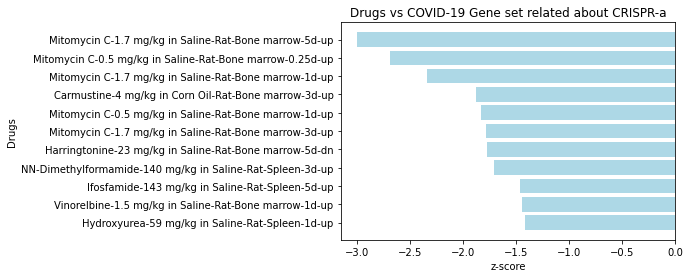

In [66]:
from matplotlib import cm
cmap = cm.jet(np.linspace(0, 1, 10))
x = np.arange(len(z_score_plt))
plt.barh(x, z_score_plt , color='#ADD8E6')
plt.yticks(x, drug_rank_plt)
plt.ylabel('Drugs')
plt.xlabel('z-score')
plt.title('Drugs vs COVID-19 Gene set related about CRISPR-a')
plt.gca().invert_yaxis()
plt.show()
#plt.savefig('../../data/picture/Drugs_vs_GeneSetRelatedCOVIDaboutCRISPR_all.png')

### function related gene set

In [74]:
g2g_dataframe_disease_pathway = g2g_dataframe[g2g_dataframe.index.isin(function)]
g2g_dataframe_disease_pathway

0         1         2         3         4         5         6    \
gene                                                                            
PSMD4   -0.137230  0.119267  0.172397  0.098050  0.062651 -0.121894 -0.041988   
RHOA     0.174755 -0.122616  0.024465  0.222977  0.153304 -0.385418  0.049415   
RBX1     0.154529  0.135251 -0.003179  0.009166  0.140370 -0.129565 -0.027169   
PABPC1   0.002531  0.002936  0.047458  0.104582  0.086855 -0.205164 -0.216906   
MRPS25   0.106036  0.006605 -0.114037 -0.037651  0.070181 -0.117366 -0.110169   
...           ...       ...       ...       ...       ...       ...       ...   
HECTD1  -0.018660 -0.210056  0.082394 -0.212041  0.231722  0.268953  0.074765   
SLC35B1  0.282142 -0.116001  0.118198  0.131503  0.070781 -0.200342 -0.166209   
NDUFAF2 -0.130198  0.212899  0.064541 -0.119938  0.042641 -0.087553 -0.206809   
SLC30A9 -0.085075 -0.021696 -0.059914  0.272966 -0.317876  0.136142 -0.301886   
NPC2     0.237416 -0.113744 -0.126035 -0.165505 -0.063524  0.386771 -0.503873   

              7         8         9    ...       290       291       292  \
gene                                   ...                                 
PSMD4    0.131091 -0.025261 -0.068476  ... -0.025660 -0.724149  0.006923   
RHOA     0.078559 -0.111955  0.047027  ...  0.471123  0.505535  0.608676   
RBX1    -0.185461  0.024644 -0.105711  ... -0.056876 -0.347491 -0.211646   
PABPC1  -0.290588 -0.120903  0.161402  ...  0.190838  0.140339 -0.305139   
MRPS25  -0.006673 -0.090432  0.179433  ...  0.222499 -0.271341  0.471220   
...           ...       ...       ...  ...       ...       ...       ...   
HECTD1   0.193019  0.160030  0.008409  ...  0.013655 -0.085049 -0.303765   
SLC35B1 -0.211428 -0.008591  0.458990  ...  0.459590 -0.630945 -0.094847   
NDUFAF2 -0.042760 -0.144668  0.088668  ...  1.061115  0.158037 -0.330854   
SLC30A9 -0.068124  0.032970  0.096991  ... -0.066986 -0.165720  0.589043   
NPC2     0.074789  0.061559  0.298099  ... -0.071407 -0.348072 -0.129531   

              293       294       295       296       297       298       299  
gene                                                                           
PSMD4    0.708591 -0.998344  0.146174 -0.413383  0.036258 -0.589303  2.307654  
RHOA     0.334893  0.328151  0.077682 -0.661063  0.324358  1.374497  2.670882  
RBX1     0.549933 -0.866758  0.302497  0.055007  0.672922 -1.182373  2.316441  
PABPC1  -0.109511  0.146524 -0.953888 -0.725125 -0.264740 -1.353784  2.190597  
MRPS25   0.886219 -0.231662 -0.898924 -0.316474 -1.357710 -1.146208  0.878045  
...           ...       ...       ...       ...       ...       ...       ...  
HECTD1   0.167886 -0.508031 -0.126034 -0.326815  0.276336 -1.140766  1.516213  
SLC35B1 -0.832305 -0.440390  0.031554  0.180365 -1.315206  0.033524  1.388198  
NDUFAF2  0.627966 -0.352194  0.434270  0.548585 -1.400304 -0.621330  0.872879  
SLC30A9 -0.479181  0.262240  0.064210  0.059867 -0.350863 -0.223592  1.011118  
NPC2    -0.956192 -0.498523  0.104940  0.748576 -1.069126  0.487488  1.448538  

[72 rows x 300 columns]

In [75]:
p_value_for_drug = []
z_score_for_drug = []
for drug in tqdm(range(len(DrugMatrix_list))):
    g2g_dataframe_drug_pathway = g2g_dataframe[g2g_dataframe.index.isin(DrugMatrix_list[drug])]
    DiseaseAndDrug_mu_distance = []
    mean_disease = gene_set_mean(g2g_dataframe_disease_pathway)
    mean_drug = gene_set_mean(g2g_dataframe_drug_pathway)
    norm = np.linalg.norm(mean_disease - mean_drug)
    node_complement = copy.deepcopy(list(node))
    for i in DrugMatrix_list[drug]:
        if i in node:
            node_complement.remove(i)
    for i in range(100):
        random_choice = random.sample(node_complement,k=len(g2g_dataframe_drug_pathway))
        g2g_dataframe_drug_pathway_random = g2g_dataframe[g2g_dataframe.index.isin(random_choice)]
        mean = gene_set_mean(g2g_dataframe_drug_pathway_random)
        norm_random = np.linalg.norm(mean_disease - mean)
        DiseaseAndDrug_mu_distance.append(norm_random)
    mean_in_random = np.mean(DiseaseAndDrug_mu_distance)
    std_in_random = np.std(DiseaseAndDrug_mu_distance)
    z_score = (norm - mean_in_random)/std_in_random
    z_score_for_drug.append(z_score)
    p_value = scipy.stats.norm.sf(abs(z_score))*2
    p_value_for_drug.append(p_value)

100%|██████████████████████████████████████████████████████████████████████████████| 7876/7876 [41:52<00:00,  3.13it/s]


In [76]:
#print(DrugMatrix_list[1975])
#print(DrugMatrix_list[1975])
#rank_p_value_for_drug = scipy.stats.rankdata(p_value_for_drug)
rank_p_value_for_drug = scipy.stats.rankdata(z_score_for_drug) #根據z-score，從小到大排序，回傳index
drug_rank10 = []
z_score_rank10 = []
p_value_rank10 = []
with open('../../data/function_drug_candidate.csv','w') as drug_candidate_file:
    for i in range(1,301):
    #if z_score_for_drug[list(rank_p_value_for_drug).index(i)]<=0.15:
        if z_score_for_drug[list(rank_p_value_for_drug).index(i)] == None:
            continue
        drug_rank10.append(DrugMatrix_list[list(rank_p_value_for_drug).index(i)][0])
        drug_candidate_file.write(DrugMatrix_list[list(rank_p_value_for_drug).index(i)][0])
        drug_candidate_file.write(',')
        z_score_rank10.append(z_score_for_drug[list(rank_p_value_for_drug).index(i)])
        drug_candidate_file.write(str(z_score_for_drug[list(rank_p_value_for_drug).index(i)]))
        drug_candidate_file.write(',')
        p_value_rank10.append(-np.log(p_value_for_drug[list(rank_p_value_for_drug).index(i)]))
        drug_candidate_file.write(str(-np.log(p_value_for_drug[list(rank_p_value_for_drug).index(i)])))
        drug_candidate_file.write('\n')
        print('rank',i, DrugMatrix_list[list(rank_p_value_for_drug).index(i)][0],p_value_for_drug[list(rank_p_value_for_drug).index(i)],z_score_for_drug[list(rank_p_value_for_drug).index(i)],sep='\t')

rank	1	Gentamicin-267 mg/kg in Corn Oil-Rat-Kidney-3d-up	7.308673406959058e-22	-9.60924
rank	2	Neomycin-877 mg/kg in Corn Oil-Rat-Kidney-5d-up	5.971930273781105e-21	-9.390494
rank	3	Methotrexate-0.3 mg/kg in Corn Oil-Rat-Liver-5d-up	7.98579536108397e-21	-9.359839
rank	4	Tetracycline-520 uM in DMSO-Rat-Primary rat hepatocytes-1d-up	8.46625605573267e-21	-9.353664
rank	5	Camptothecin-2.5 mg/kg in Saline-Rat-Bone marrow-3d-up	4.7822331276603554e-20	-9.16882
rank	6	Cadmium Chloride-66 mg/kg in Corn Oil-Rat-Kidney-5d-up	5.569919071029745e-20	-9.152368
rank	7	Cisplatin-2 mg/kg in Saline-Rat-Kidney-1d-up	1.6129506087329104e-19	-9.03682
rank	8	6-Mercaptopurine-5 uM in DMSO-Rat-Primary rat hepatocytes-1d-dn	2.4632509082779495e-18	-8.733768
rank	9	Pentamidine-18 mg/kg in Saline-Rat-Bone marrow-1d-dn	7.564171961676843e-18	-8.606019
rank	10	Loperamide-47 mg/kg in CMC-Rat-Intestine-1d-dn	1.4603470662267684e-17	-8.530248
rank	11	Piracetam-2500 mg/kg in CMC-Rat-Brain-5d-dn	1.8786798792297547e-17	-8.50

rank	103	Lead (II) Acetate-600 mg/kg in Saline-Rat-Bone marrow-3d-dn	3.2024649702356466e-12	-6.96854
rank	104	Esmolol-27 mg/kg in Saline-Rat-Heart-3d-dn	3.508835401643786e-12	-6.9556727
rank	105	Carboplatin-14 mg/kg in Saline-Rat-Bone marrow-1d-dn	3.647919264783317e-12	-6.950191
rank	106	Noscapine-570 mg/kg in CMC-Rat-Bone marrow-5d-up	3.73189845381497e-12	-6.9469795
rank	107	Mitomycin C-0.5 mg/kg in Saline-Rat-Bone marrow-1d-dn	3.745679435491168e-12	-6.9464593
rank	108	Doxepin-132 uM in DMSO-Rat-Primary rat hepatocytes-1d-up	3.829613230999559e-12	-6.943331
rank	109	Lead(IV) Acetate-200 mg/kg in Saline-Rat-Spleen-0.25d-dn	3.900549595530523e-12	-6.9407387
rank	110	Levosulpiride-1200 mg/kg in CMC-Rat-Heart-1d-dn	3.9102656076681565e-12	-6.9403872
rank	111	Ketoconazole-25 mg/kg in Corn Oil-Rat-Liver-1d-up	4.14621027506786e-12	-6.932106
rank	112	Dichlorvos-17 mg/kg in Water-Rat-Heart-1d-up	5.1113871640768596e-12	-6.902448
rank	113	NN-Dimethylformamide-140 mg/kg in Saline-Rat-Bone marrow-3d-

rank	190	Carboplatin-14 mg/kg in Saline-Rat-Spleen-1d-dn	1.558068746901517e-10	-6.399578
rank	191	Busulfan-500 uM in DMSO-Rat-Primary rat hepatocytes-1d-up	1.5698771520724553e-10	-6.398425
rank	192	Altretamine-40 mg/kg in Corn Oil-Rat-Bone marrow-3d-dn	1.5846543335994616e-10	-6.396994
rank	193	Chlorambucil-4.5 mg/kg in Corn Oil-Rat-Spleen-3d-dn	1.6535444359323922e-10	-6.3904905
rank	194	Gadopentetate Dimeglumine-125 mg/kg in Saline-Rat-Kidney-3d-up	1.6686847608461227e-10	-6.3890967
rank	195	L-Buthionine Sulfoximine-100000 uM in DMSO-Rat-Primary rat hepatocytes-1d-up	1.7109838596174816e-10	-6.3852673
rank	196	Azlocillin-800 mg/kg in Saline-Rat-Kidney-1d-up	1.7800492554644407e-10	-6.379209
rank	197	Baclofen-6.6 mg/kg in CMC-Rat-Heart-5d-dn	1.8104814167564535e-10	-6.376612
rank	198	Gemfibrozil-100 mg/kg in Corn Oil-Rat-Kidney-3d-dn	1.8600677504031432e-10	-6.372471
rank	199	Procaine-2500 mg/kg in Water-Rat-Heart-5d-dn	1.8851772566196998e-10	-6.3704147
rank	200	Allylamine-75 mg/kg in Water-

rank	279	Chlorambucil-0.6 mg/kg in Corn Oil-Rat-Bone marrow-3d-up	3.452204205865064e-09	-5.908508
rank	280	Pyridine-223 mg/kg in Water-Rat-Kidney-1d-dn	3.4641332254304936e-09	-5.9079394
rank	281	Beta-Estradiol-150 mg/kg in Corn Oil-Rat-Skeletal muscle-3d-up	3.543055378775275e-09	-5.9042263
rank	282	Carbon Tetrachloride-1175 mg/kg in Corn Oil-Rat-Bone marrow-1d-up	3.696060566690056e-09	-5.8972516
rank	283	Digitonin-75 mg/kg in Corn Oil-Rat-Heart-1d-up	3.7575950609470724e-09	-5.8945255
rank	284	Cyproheptadine-37 mg/kg in CMC-Rat-Heart-3d-dn	3.784488163095865e-09	-5.8933477
rank	285	Diphenhydramine-10.9 mg/kg in Water-Rat-Heart-5d-dn	4.079243278969034e-09	-5.8809476
rank	286	Amiloride-22 mg/kg in CMC-Rat-Heart-3d-dn	4.085041592978443e-09	-5.8807125
rank	287	Doxorubicin-0.65 mg/kg in Saline-Rat-Spleen-1d-dn	4.270148804383575e-09	-5.8733735
rank	288	Bithionol-59 mg/kg in Corn Oil-Rat-Bone marrow-3d-up	4.3417397654580955e-09	-5.870618
rank	289	Irinotecan-5 mg/kg in Saline-Rat-Heart-3d-dn	4.3

In [82]:
z_score_plt = list(map(float,z_score_rank10))
#print(z_score_rank10)
z_score_plt = z_score_plt[:21]
drug_rank_plt = drug_rank10[:21]

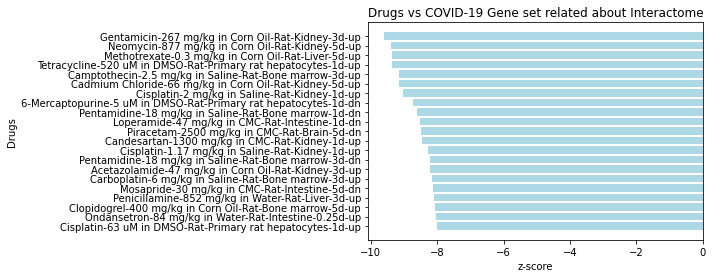

<Figure size 432x288 with 0 Axes>

In [83]:
from matplotlib import cm
cmap = cm.jet(np.linspace(0, 1, 10))
x = np.arange(len(z_score_plt))
plt.barh(x, z_score_plt , color='#ADD8E6')
plt.yticks(x, drug_rank_plt)
plt.ylabel('Drugs')
plt.xlabel('z-score')
plt.title('Drugs vs COVID-19 Gene set related about Interactome')
plt.gca().invert_yaxis()
plt.show()
plt.savefig('../../data/picture/Drugs_vs_GeneSetRelatedCOVIDaboutFunction_all',format='png')

### ACE2 gene set

In [121]:
g2g_dataframe_disease_pathway = g2g_dataframe[g2g_dataframe.index.isin(ace2)]
g2g_dataframe_disease_pathway

0         1         2         3         4         5    \
gene                                                                      
RAB7A        0.022178 -0.055640 -0.201210 -0.015118 -0.188326 -0.015908   
VPS29        0.041450  0.001487  0.025648 -0.266313 -0.085632 -0.186372   
VPS35        0.260943 -0.174859 -0.053767 -0.032490 -0.048345 -0.227013   
ACTR2        0.142029 -0.316022  0.119639  0.133224 -0.062078 -0.437041   
ARPC3        0.022142 -0.175853 -0.022178  0.178342 -0.009038 -0.292300   
ARPC4        0.054760 -0.131207 -0.019061  0.171200 -0.037743 -0.248629   
ACTR3        0.113556 -0.141153 -0.084623  0.060836 -0.155838 -0.389953   
COMMD3-BMI1  0.189190 -0.007340 -0.028933 -0.066898  0.009092  0.004494   
NPC1         0.102417 -0.139809 -0.173949 -0.056705 -0.178511  0.160102   
CCZ1        -0.019629 -0.079048 -0.056893 -0.048743 -0.181949  0.089275   
ACE2         0.048304 -0.015851  0.017926  0.035441  0.113974  0.062308   
CCDC22      -0.269121  0.008326 -0.211533  0.395432  0.020307 -0.205873   
ASCC3       -0.042735  0.129697 -0.223488 -0.288109  0.186163  0.176843   
TFE3        -0.092435 -0.143547 -0.166067 -0.198689 -0.060836 -0.045929   
CCZ1B       -0.000380 -0.004028 -0.144361 -0.041813 -0.202777  0.048421   
CTSL        -0.027649  0.015938 -0.009115 -0.058273  0.046818 -0.085605   
COMMD7      -0.107583 -0.106210 -0.289197  0.227233 -0.015866 -0.124352   
COMMD5      -0.096358  0.115530 -0.375032  0.290929 -0.138387 -0.110437   
COMMD8      -0.048052  0.054634 -0.441736  0.540206  0.141549  0.056022   
COMMD4      -0.148474  0.034495 -0.352822  0.254184 -0.020089 -0.085133   
COMMD2      -0.057729 -0.005890 -0.253959  0.259676  0.003867 -0.058998   
COMMD10     -0.151051 -0.001515 -0.342552  0.247020 -0.059794 -0.082011   
COMMD3      -0.198036 -0.064801 -0.287452  0.397981 -0.009842 -0.031833   
CCDC93      -0.237307 -0.102877 -0.212194  0.110540  0.070669 -0.079632   
WDR91        0.471125 -0.069831 -0.063228 -0.071699 -0.005076 -0.174133   
WDR81        0.576736 -0.177549  0.021852 -0.017107  0.009778 -0.135101   
NPC2         0.237416 -0.113744 -0.126035 -0.165505 -0.063524  0.386771   

                  6         7         8         9    ...       290       291  \
gene                                                 ...                       
RAB7A       -0.000558  0.033286 -0.110532  0.184640  ... -0.467682 -0.182319   
VPS29        0.006970  0.165371  0.009342  0.028353  ... -0.570832 -0.261074   
VPS35        0.329565  0.217826 -0.310671 -0.015732  ... -0.299005  0.092172   
ACTR2       -0.070897  0.060448  0.196248  0.139881  ...  0.345415  0.614687   
ARPC3       -0.087999 -0.034262  0.009168  0.027508  ...  0.223051  0.659796   
ARPC4       -0.111539 -0.085790  0.087632  0.115538  ...  0.194346  0.756982   
ACTR3       -0.145922 -0.090755  0.507156  0.273185  ...  0.170366  0.685921   
COMMD3-BMI1  0.121493 -0.119051 -0.045198 -0.120440  ... -0.027518 -0.415906   
NPC1        -0.216418  0.018329  0.034599  0.410413  ... -0.069120  0.006082   
CCZ1        -0.056253 -0.192317 -0.036125  0.284275  ... -0.277527 -0.352067   
ACE2         0.147346  0.120781 -0.015833 -0.036758  ... -0.174573  0.081366   
CCDC22      -0.461823 -0.272188  0.176076  0.210872  ... -0.323852 -0.109648   
ASCC3       -0.391452  0.203736 -0.053131  0.353565  ...  0.018436 -0.178167   
TFE3        -0.357048 -0.093568 -0.219920  0.220201  ...  0.234257 -0.398365   
CCZ1B        0.053366 -0.056153 -0.010245  0.243640  ... -0.287783 -0.234879   
CTSL        -0.285271 -0.097157 -0.250927  0.178632  ... -0.571834 -0.051205   
COMMD7      -0.319970 -0.028458  0.014871  0.164544  ... -0.379684 -0.161878   
COMMD5      -0.262966 -0.169961  0.045324  0.143549  ... -0.659576 -0.393888   
COMMD8      -0.342542  0.003359  0.102818  0.096886  ... -0.302948 -0.320064   
COMMD4      -0.327790 -0.104522  0.089935  0.189952  ... -0.427853 -0.288644   
COMMD2      -0.282400 -0.181834  0.085688  0.196531  ... -0.434945 -0.231869   
CO

In [122]:
p_value_for_drug = []
z_score_for_drug = []
for drug in tqdm(range(len(DrugMatrix_list))):
    g2g_dataframe_drug_pathway = g2g_dataframe[g2g_dataframe.index.isin(DrugMatrix_list[drug])]
    DiseaseAndDrug_mu_distance = []
    mean_disease = gene_set_mean(g2g_dataframe_disease_pathway)
    mean_drug = gene_set_mean(g2g_dataframe_drug_pathway)
    norm = np.linalg.norm(mean_disease - mean_drug)
    node_complement = copy.deepcopy(list(node))
    for i in DrugMatrix_list[drug]:
        if i in node:
            node_complement.remove(i)
    for i in range(100):
        random_choice = random.sample(node_complement,k=len(g2g_dataframe_drug_pathway))
        g2g_dataframe_drug_pathway_random = g2g_dataframe[g2g_dataframe.index.isin(random_choice)]
        mean = gene_set_mean(g2g_dataframe_drug_pathway_random)
        norm_random = np.linalg.norm(mean_disease - mean)
        DiseaseAndDrug_mu_distance.append(norm_random)
    mean_in_random = np.mean(DiseaseAndDrug_mu_distance)
    std_in_random = np.std(DiseaseAndDrug_mu_distance)
    z_score = (norm - mean_in_random)/std_in_random
    z_score_for_drug.append(z_score)
    p_value = scipy.stats.norm.sf(abs(z_score))*2
    p_value_for_drug.append(p_value)

100%|██████████████████████████████████████████████████████████████████████████████| 7876/7876 [53:01<00:00,  2.48it/s]


In [125]:
#rank_z_score_for_drug = scipy.stats.rankdata(z_score_for_drug)
rank_p_value_for_drug = scipy.stats.rankdata(z_score_for_drug)
#print(len(rank_p_value_for_drug))
#print(rank_p_value_for_drug,sep='\t',)

In [126]:
#print(list(rank_p_value_for_drug).index())

In [127]:
print(list(rank_z_score_for_drug).index(7876))

1568


In [128]:
#print(DrugMatrix_list[1975])
#print(DrugMatrix_list[1975])
#rank_p_value_for_drug = scipy.stats.rankdata(p_value_for_drug)
#rank_p_value_for_drug = scipy.stats.rankdata(z_score_for_drug) #根據z-score，從小到大排序，回傳index
drug_rank10 = []
z_score_rank10 = []
p_value_rank10 = []
with open('../../data/ACE2_drug_candidate.csv','w') as drug_candidate_file:
    #for i in crispr_drug_candidate:
        #print(i)
        #drug_candidate_file.write(str(i))
        #drug_candidate_file.write('\n')
    for i in range(1,301):
    #if z_score_for_drug[list(rank_p_value_for_drug).index(i)]<=0.15:
        if z_score_for_drug[list(rank_p_value_for_drug).index(i)] == None:
            continue
        drug_rank10.append(DrugMatrix_list[list(rank_p_value_for_drug).index(i)][0])
        drug_candidate_file.write(DrugMatrix_list[list(rank_p_value_for_drug).index(i)][0])
        drug_candidate_file.write(',')
        z_score_rank10.append(z_score_for_drug[list(rank_p_value_for_drug).index(i)])
        drug_candidate_file.write(str(z_score_for_drug[list(rank_p_value_for_drug).index(i)]))
        drug_candidate_file.write(',')
        p_value_rank10.append(-np.log(p_value_for_drug[list(rank_p_value_for_drug).index(i)]))
        drug_candidate_file.write(str(-np.log(p_value_for_drug[list(rank_p_value_for_drug).index(i)])))
        drug_candidate_file.write('\n')
        print('rank',i, DrugMatrix_list[list(rank_p_value_for_drug).index(i)][0],p_value_for_drug[list(rank_p_value_for_drug).index(i)],z_score_for_drug[list(rank_p_value_for_drug).index(i)],sep='\t')

rank	1	Clopidogrel-400 mg/kg in Corn Oil-Rat-Bone marrow-0.25d-up	1.7377826450621805e-05	-4.296165
rank	2	Nimesulide-61.7 uM in DMSO-Rat-Primary rat hepatocytes-0.67d-up	2.1036754021312683e-05	-4.253593
rank	3	Hydrocortisone-56 mg/kg in Corn Oil-Rat-Bone marrow-5d-dn	3.766465131877502e-05	-4.1213574
rank	4	Sodium Arsenite-10 mg/kg in Saline-Rat-Bone marrow-3d-dn	6.508713705283571e-05	-3.9935653
rank	5	Foscarnet-350 mg/kg in Saline-Rat-Bone marrow-5d-up	0.00013892635733747912	-3.810072
rank	6	Acyclovir-980 mg/kg in Saline-Rat-Bone marrow-1d-up	0.00037657413950913706	-3.555979
rank	7	Labetalol-250 uM in DMSO-Rat-Primary rat hepatocytes-0.67d-up	0.000907862677155777	-3.317625
rank	8	Moclobemide-266 mg/kg in Water-Rat-Brain-5d-up	0.0010314594038981037	-3.2818022
rank	9	Altretamine-13 mg/kg in Corn Oil-Rat-Bone marrow-3d-up	0.0013826033111705382	-3.1982584
rank	10	Famciclovir-1200 mg/kg in Saline-Rat-Spleen-5d-up	0.0014365073444303213	-3.1872134
rank	11	Harringtonine-23 mg/kg in Saline-Rat-

rank	89	Altretamine-13 mg/kg in Corn Oil-Rat-Bone marrow-1d-dn	0.04034971045969539	-2.0501509
rank	90	Dexfenfluramine-29 mg/kg in Water-Rat-Kidney-5d-up	0.04069982474979118	-2.046575
rank	91	Chlorambucil-1540 uM in DMSO-Rat-Primary rat hepatocytes-0.67d-dn	0.04189209579902585	-2.0345905
rank	92	N-Nitrosodiethylamine-34 mg/kg in Saline-Rat-Spleen-5d-up	0.04191013035723744	-2.0344114
rank	93	Theophylline-225 mg/kg in Water-Rat-Brain-5d-up	0.0425313121951089	-2.0282836
rank	94	Marimastat-1000 uM in DMSO-Rat-Primary rat hepatocytes-1d-up	0.04477267126157164	-2.006784
rank	95	Mitomycin C-1.7 mg/kg in Saline-Rat-Spleen-1d-up	0.04479403474638757	-2.0065835
rank	96	Doxepin-132 uM in DMSO-Rat-Primary rat hepatocytes-1d-up	0.045090143802326905	-2.0038126
rank	97	Aztreonam-1100 mg/kg in CMC-Rat-Spleen-3d-dn	0.04628939863025093	-1.9927448
rank	98	Methotrexate-0.3 mg/kg in Corn Oil-Rat-Bone marrow-3d-up	0.04636996098380298	-1.99201
rank	99	Lead (II) Acetate-600 mg/kg in Saline-Rat-Bone marrow-1d-up

rank	193	Noscapine-570 mg/kg in CMC-Rat-Bone marrow-5d-dn	0.13214114441515482	-1.5057119
rank	194	3-Methylcholanthrene-23 uM in DMSO-Rat-Primary rat hepatocytes-1d-up	0.13403524472166928	-1.4983773
rank	195	Etoposide-100 mg/kg in Corn Oil-Rat-Bone marrow-3d-up	0.13463848270362241	-1.4960582
rank	196	Valproic Acid-850 mg/kg in Water-Rat-Bone marrow-5d-dn	0.13511388596483576	-1.4942362
rank	197	N-Nitrosodiethylamine-34 mg/kg in Saline-Rat-Spleen-3d-up	0.13736296721230598	-1.4856831
rank	198	Carboplatin-14 mg/kg in Saline-Rat-Bone marrow-5d-up	0.14060273810106225	-1.4735502
rank	199	Lead(IV) Acetate-600 mg/kg in Saline-Rat-Spleen-1d-dn	0.14072029535446154	-1.473114
rank	200	Clomipramine-7 uM in DMSO-Rat-Primary rat hepatocytes-1d-up	0.1424967922991013	-1.4665563
rank	201	Altretamine-40 mg/kg in Corn Oil-Rat-Bone marrow-5d-dn	0.1437081176615374	-1.4621208
rank	202	Coumarin-111 mg/kg in Corn Oil-Rat-Bone marrow-1d-dn	0.1446819516284074	-1.4585756
rank	203	Aztreonam-1100 mg/kg in CMC-Rat-Spl

rank	289	Racepinephrine-0.77 mg/kg in Saline-Rat-Heart-3d-up	0.2290997641713708	-1.2026811
rank	290	Cisplatin-2 mg/kg in Saline-Rat-Bone marrow-3d-up	0.23367759932033882	-1.1909388
rank	291	Mitotane-900 mg/kg in Water-Rat-Bone marrow-1d-up	0.2337482776148897	-1.1907588
rank	292	Doxorubicin-3 mg/kg in Saline-Rat-Spleen-3d-up	0.23622553302620508	-1.1844739
rank	293	Lipopolysaccharide E. Coli O55:B5-1.25 mg/kg in Saline-Rat-Kidney-5d-up	0.2366783170547999	-1.1833302
rank	294	Penicillamine-100 mg/kg in Water-Rat-Bone marrow-3d-dn	0.2367265859687473	-1.1832083
rank	295	Marimastat-1000 uM in DMSO-Rat-Primary rat hepatocytes-0.67d-up	0.236830704258707	-1.1829456
rank	296	1-Naphthyl Isothiocyanate-30 mg/kg in Corn Oil-Rat-Bone marrow-3d-up	0.23714642191182256	-1.1821494
rank	297	Diethylstilbestrol-2.8 mg/kg in Corn Oil-Rat-Spleen-0.25d-up	0.23931455549944902	-1.1767018
rank	298	Gatifloxacin-770 mg/kg in Corn Oil-Rat-Kidney-1d-up	0.24016966866791345	-1.1745628
rank	299	Pyrilamine-688 mg/kg in W

In [129]:
z_score_plt = list(map(float,z_score_rank10))
#print(z_score_rank10)
z_score_plt = z_score_plt[:11]
drug_rank_plt = drug_rank10[:11]

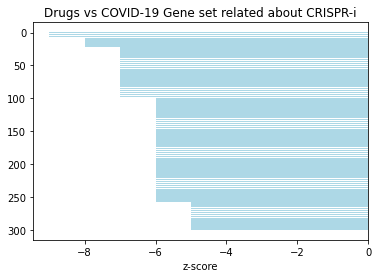

<Figure size 432x288 with 0 Axes>

In [86]:
from matplotlib import cm
cmap = cm.jet(np.linspace(0, 1, 10))
x = np.arange(len(drug_rank10))
plt.barh(x, z_score_rank10 , color='#ADD8E6')
#plt.yticks(x, drug_rank10)
#plt.ylabel('Drugs')
plt.xlabel('z-score')
plt.title('Drugs vs COVID-19 Gene set related about CRISPR-i')
plt.gca().invert_yaxis()
plt.show()
plt.savefig('../../data/picture/Drugs_vs_GeneSetRelatedCOVIDaboutACE2_all',format='png')

## plot

In [432]:
from matplotlib import cm

[-9, -9, -9, -9, -9, -9, -9, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6, -6,

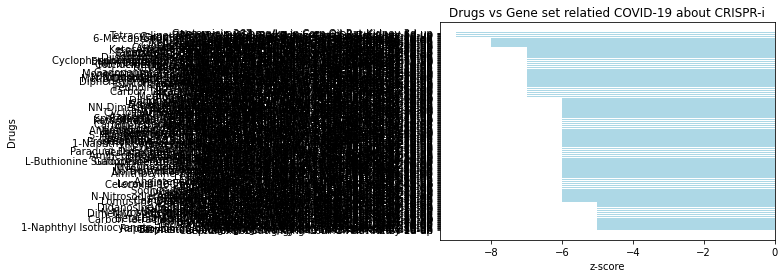

<Figure size 432x288 with 0 Axes>

In [84]:
cmap = cm.jet(np.linspace(0, 1, 10))
x = np.arange(len(drug_rank10))
z_score_rank10 = list(map(int,z_score_rank10))
print(z_score_rank10)
plt.barh(x, z_score_rank10, color='#ADD8E6')
plt.yticks(x, drug_rank10)
plt.ylabel('Drugs')
plt.xlabel('z-score')
plt.title('Drugs vs Gene set relatied COVID-19 about CRISPR-i')
plt.gca().invert_yaxis()
plt.show()
plt.savefig('../../data/picture/Drugs_vs_GeneSetRelatedCOVIDaboutACE2.png')